In [1]:
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.patches import FancyArrowPatch
import scipy.stats as stats
import pymongo
import seaborn as sns
import humanize
import warnings
import os


In [2]:
warnings.filterwarnings('ignore')

load_dotenv()

True

In [3]:
title_font = {"fontname":"Nimbus Sans", "size":18, "color":"midnightblue"}
subtitle_font = {"fontname":"Roboto", "size":14, "color":"rebeccapurple"}
text_font = {"fontname": "DejaVu Sans", "size": 12, "color": "dimgray"}  # Ajustar el color para ser más coherente con el estilo general

# Ajustar el estilo de Seaborn
sns.set_style('ticks', {
    'axes.grid': True,
    'grid.color': '0.8',  # Color claro para la rejilla
    'grid.linestyle': '--',
    'grid.linewidth': 0.6,
    'font.sans-serif': ['Nimbus Sans', 'DejaVu Sans', 'Liberation Sans', 'Bitstream Vera Sans', 'sans-serif'],
    'axes.edgecolor': '0.5'  # Ajustar el color de los bordes de los ejes para que sea suave
})

# Ajustar la resolución de la imagen
plt.rcParams['figure.dpi'] = 80



In [4]:
apartments = pd.read_csv('../data/processed/apartments.csv')
print(apartments.shape)
apartments = apartments.loc[(apartments['tipo_operacion'] == 'ARRIENDO') & (apartments['coords_modified'] == False)]
apartments = apartments.drop(['precio_venta', 'tipo_operacion', 'coords_modified'], axis=1)
apartments.head()

(19551, 45)


,codigo,tipo_propiedad,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,...,terraza,vigilancia,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm,parque_cercano,distancia_parque_m,is_cerca_parque
9724,MC5214856,APARTAMENTO,106.0,3.0,2.0,560000.0,2.0,COLINA Y ALREDEDORES,4.0,ENTRE 5 Y 10 ANOS,...,0,0,SUBA,S.C. CIUDAD JARDIN NORTE,Suba - AV. Boyacá,258.77,1,PARQUE VECINAL AGRUPACIÓN DE VIVIENDA EN BALCO...,1169.15,0
9725,MC5226855,APARTAMENTO,70.0,3.0,2.0,300000.0,1.0,SALITRE MODELIA,4.0,MAS DE 20 ANOS,...,0,0,FONTIBON,SAUZALITO,Av. Rojas – UNISALESIANA,641.89,0,PARQUE VECINAL CARLOS LLERAS (EL FUEGO),205.51,1
9726,MC5224821,APARTAMENTO,44.5,1.0,1.0,391000.0,1.0,SANTA BARBARA,6.0,ENTRE 10 Y 20 ANOS,...,0,0,USAQUEN,SANTA BARBARA CENTRAL I Y II,Calle 106,1586.97,0,PARQUE METROPOLITANO EL COUNTRY,1714.01,0
9727,MC3587458,APARTAMENTO,43.0,1.0,1.0,NaN,1.0,LA SOLEDAD,4.0,ENTRE 0 Y 5 ANOS,...,0,0,TEUSAQUILLO,ARMENIA,Calle 26,141.86,1,PARQUE METROPOLITANO EL RENACIMIENTO - PARQUE ...,445.06,1
9728,15234-M5227729,APARTAMENTO,212.0,4.0,4.0,NaN,2.0,CHICO,6.0,MAS DE 20 ANOS,...,0,1,CHAPINERO,LA CABRERA,Héroes,1480.54,0,PARQUE VECINAL URBANIZACIÓN LA CABRERA,494.38,1


In [5]:
apartments.shape

(9128, 42)

In [6]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9128 entries, 9724 to 19550
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   codigo                   9128 non-null   object 
 1   tipo_propiedad           9128 non-null   object 
 2   area                     9128 non-null   float64
 3   habitaciones             9127 non-null   float64
 4   banos                    9127 non-null   float64
 5   administracion           5981 non-null   float64
 6   parqueaderos             9127 non-null   float64
 7   sector                   8723 non-null   object 
 8   estrato                  9128 non-null   float64
 9   antiguedad               9128 non-null   object 
 10  latitud                  9128 non-null   float64
 11  longitud                 9128 non-null   float64
 12  direccion                0 non-null      object 
 13  descripcion              9128 non-null   object 
 14  website                  

In [7]:
apartments.describe()

,area,habitaciones,banos,administracion,parqueaderos,estrato,latitud,longitud,precio_arriendo,jacuzzi,...,ascensor,conjunto_cerrado,piscina,salon_comunal,terraza,vigilancia,distancia_estacion_tm_m,is_cerca_estacion_tm,distancia_parque_m,is_cerca_parque
count,9128.000000,9127.000000,9127.000000,5.981000e+03,9127.000000,9128.000000,9128.000000,9128.000000,9.126000e+03,9128.000000,...,9128.000000,9128.000000,9128.000000,9128.0,9128.0,9128.000000,9128.000000,9128.000000,9128.000000,9128.000000
mean,139.491677,2.463679,2.673496,2.204529e+06,1.667580,5.024430,4.679960,-74.059176,1.533337e+07,0.039658,...,0.617441,0.333151,0.072743,0.0,0.0,0.548422,1271.507744,0.198072,803.776799,0.299737
std,136.331486,0.921277,1.258633,5.211948e+07,1.152394,1.221478,0.035766,0.029699,2.671726e+08,0.195166,...,0.486039,0.471366,0.259729,0.0,0.0,0.497677,824.024886,0.398568,467.729735,0.458168
min,1.000000,0.000000,0.000000,1.000000e+00,0.000000,1.000000,4.488560,-74.212140,5.500000e+05,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.360000,0.000000,0.270000,0.000000
25%,60.000000,2.000000,2.000000,4.160000e+05,1.000000,4.000000,4.661400,-74.061743,2.200000e+06,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,618.880000,0.000000,448.635000,0.000000
50%,105.000000,3.000000,2.000000,8.500000e+05,2.000000,6.000000,4.678339,-74.050630,4.500000e+06,0.000000,...,1.000000,0.000000,0.000000,0.0,0.0,1.000000,1187.840000,0.000000,721.100000,0.000000
75%,190.000000,3.000000,4.000000,1.508000e+06,2.000000,6.000000,4.701710,-74.043950,9.000000e+06,0.000000,...,1.000000,1.000000,0.000000,0.0,0.0,1.000000,1662.467500,0.000000,1084.675000,1.000000
max,5990.000000,5.000000,5.000000,3.500000e+09,20.000000,6.000000,4.799836,-74.016930,1.690000e+10,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,1.000000,5590.850000,1.000000,4737.570000,1.000000


In [8]:
apartments.columns

Index(['codigo', 'tipo_propiedad', 'area', 'habitaciones', 'banos',
       'administracion', 'parqueaderos', 'sector', 'estrato', 'antiguedad',
       'latitud', 'longitud', 'direccion', 'descripcion', 'website',
       'last_view', 'datetime', 'url', 'timeline', 'estado', 'compañia',
       'precio_arriendo', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'piscina', 'salon_comunal', 'terraza', 'vigilancia', 'localidad',
       'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'parque_cercano', 'distancia_parque_m',
       'is_cerca_parque'],
      dtype='object')

In [9]:
apartments.website.value_counts()

website
metrocuadrado.com    9128
Name: count, dtype: int64

In [10]:
apartments['datetime'] = pd.to_datetime(apartments['datetime'])

In [11]:
fotmat_tick_humanize = lambda x, pos: humanize.intword(x)

# Eliminando Outliers

In [12]:
apartments['precio_arriendo'].describe().apply(lambda x: humanize.intword(x))

count      9.1 thousand
mean       15.3 million
std       267.2 million
min      550.0 thousand
25%         2.2 million
50%         4.5 million
75%         9.0 million
max        16.9 billion
Name: precio_arriendo, dtype: object

In [13]:
Q1 = apartments['precio_arriendo'].quantile(0.25)
Q3 = apartments['precio_arriendo'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.8 * IQR
upper = Q3 + 1.8 * IQR

if lower < 0:
    lower = Q1 - 0.4 * IQR

outliers = apartments.loc[(apartments['precio_arriendo'] < lower) | (apartments['precio_arriendo'] > upper)]
outliers.shape
# lower, upper

(321, 42)

In [14]:
# Porcentaje de outliers
print(f"Porcentaje de outliers: {round(outliers.shape[0] / apartments.shape[0], 5) *100} %")

Porcentaje de outliers: 3.517 %


In [15]:
apartments = apartments[(apartments['precio_arriendo'] > lower) & (apartments['precio_arriendo'] < upper)]
apartments.shape

(8805, 42)

In [16]:
apartments['precio_arriendo'].describe().apply(lambda x: humanize.intword(x)).to_frame()

,precio_arriendo
count,8.8 thousand
mean,5.8 million
std,4.7 million
min,550.0 thousand
25%,2.2 million
50%,4.3 million
75%,8.0 million
max,21.2 million


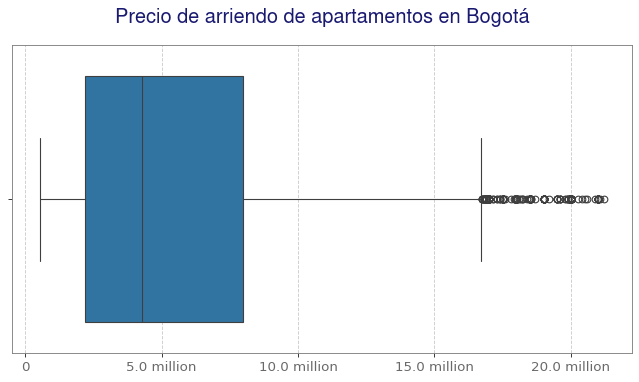

In [17]:
plt.figure(figsize=(10, 5))

sns.boxplot(x='precio_arriendo', data=apartments)
plt.title('Precio de arriendo de apartamentos en Bogotá', **title_font, pad=20)
plt.xlabel('', **subtitle_font)
plt.xticks(**text_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

plt.show()

# Analisis Univaluado

In [18]:
# selecionar todos los meses de datetime
apartments['month'] = apartments['datetime'].dt.month

# Remplazar el número del mes por el nombre
apartments['month_name'] = apartments['month'].replace({1:'Enero', 2:'Febrero', 
                                                        3:'Marzo', 4:'Abril', 5:'Mayo', 
                                                        6:'Junio', 7:'Julio', 8:'Agosto',
                                                        9:'Septiembre', 10:'Octubre',
                                                        11:'Noviembre', 12:'Diciembre'})

apartments['month_name'].value_counts()

month_name
Septiembre    8805
Name: count, dtype: int64

In [19]:
apartments['localidad'].value_counts()

localidad
CHAPINERO             3590
USAQUEN               2766
SUBA                   868
FONTIBON               266
ENGATIVA               227
SANTA FE               198
TEUSAQUILLO            196
KENNEDY                172
PUENTE ARANDA           98
LOS MARTIRES            79
BARRIOS UNIDOS          76
BOSA                    56
RAFAEL URIBE URIBE      48
CIUDAD BOLIVAR          43
CANDELARIA              43
ANTONIO NARINO          31
SAN CRISTOBAL           18
USME                    15
TUNJUELITO              15
Name: count, dtype: int64

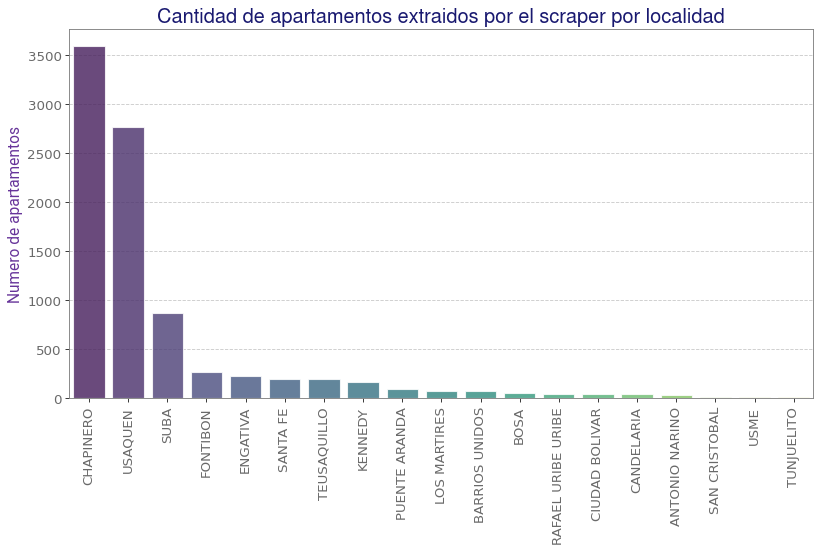

In [20]:
# Graficar la cantidad de apartamentos por localidad
plt.figure(figsize=(12, 6))

sns.countplot(
    x='localidad', 
    data=apartments,
    palette='viridis',
    alpha=.8,
    order=apartments['localidad'].value_counts().index
)

plt.title('Cantidad de apartamentos extraidos por el scraper por localidad', **title_font)
plt.xlabel('', **subtitle_font)
plt.ylabel('Numero de apartamentos', **subtitle_font)
plt.xticks(rotation=90, **text_font)
plt.yticks(**text_font)
#plt.savefig('../visualizations/rent_apartments_by_localidad.png', bbox_inches='tight')
plt.show()

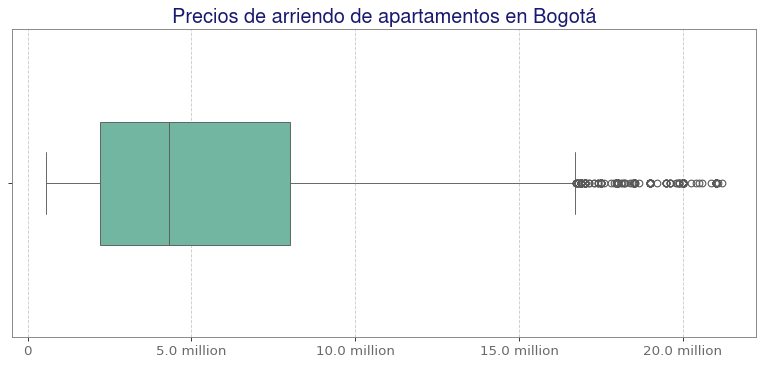

In [21]:
plt.figure(figsize=(12, 5))

sns.boxplot(
    data=apartments,
    x='precio_arriendo',
    width=.4,
    palette='Set2',
    linewidth=.8,
)

plt.title('Precios de arriendo de apartamentos en Bogotá', **title_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.xlabel('', **subtitle_font)
plt.xticks(**text_font)
plt.show()

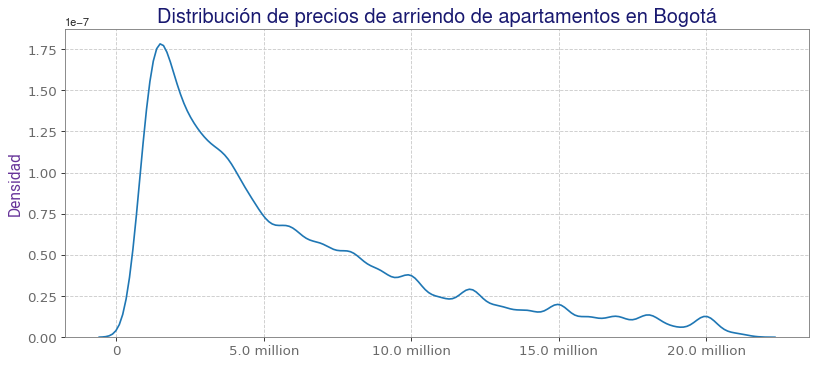

In [22]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    data=apartments,
    x='precio_arriendo',
    bw_adjust=.5,
)

plt.title('Distribución de precios de arriendo de apartamentos en Bogotá', **title_font)
plt.xlabel('', **subtitle_font)
plt.ylabel('Densidad', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.show()

In [23]:
stat, p = stats.normaltest(apartments['precio_arriendo'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('La muestra parece Gaussiana (no rechazar H0)')
else:
    print('La muestra no parece Gaussiana (rechazar H0)')

Statistics=1465.005, p=0.000
La muestra no parece Gaussiana (rechazar H0)


In [24]:
apartments['is_cerca_estacion_tm'].value_counts()

is_cerca_estacion_tm
0    7007
1    1798
Name: count, dtype: int64

In [25]:
# Porcentaje de apartamentos cerca a una estación de Transmilenio
round(apartments['is_cerca_estacion_tm'].value_counts(normalize=True) * 100, 2)

is_cerca_estacion_tm
0    79.58
1    20.42
Name: proportion, dtype: float64

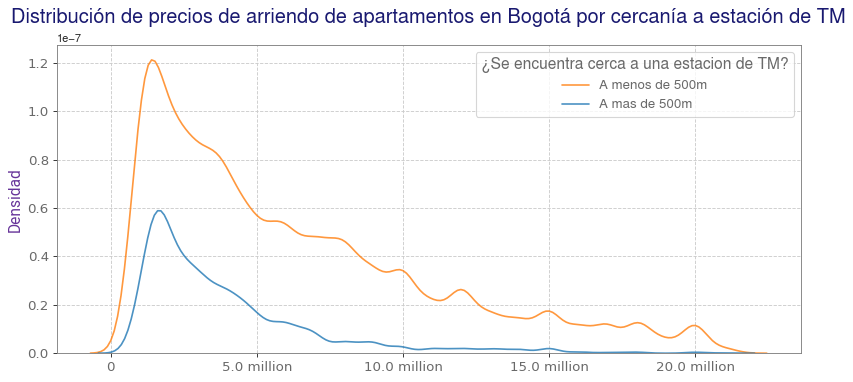

In [26]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    data=apartments,
    x='precio_arriendo',
    hue='is_cerca_estacion_tm',
    bw_adjust=.5,
    hue_order=[True, False],
    alpha=.8,
    legend=True,
)

plt.title('Distribución de precios de arriendo de apartamentos en Bogotá por cercanía a estación de TM',
          **title_font, pad=20)
plt.xlabel('', **subtitle_font)
plt.ylabel('Densidad', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
# Cambiar la fuente de la leyenda
legend = plt.legend(['A menos de 500m', 'A mas de 500m'],
           title='¿Se encuentra cerca a una estacion de TM?',
           title_fontproperties={'family':'Nimbus Sans', 'size':'14'},
           prop={'family':'Nimbus Sans', 'size':'12'},
)
legend.get_title().set_color('dimgray')
legend.get_title().set_ha('center')
legend.get_texts()[0].set_color('dimgray')
legend.get_texts()[1].set_color('dimgray')

plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.savefig('../visualizations/rent_apartments_by_is_cerca_estacion_tm.png', bbox_inches='tight')
plt.show()

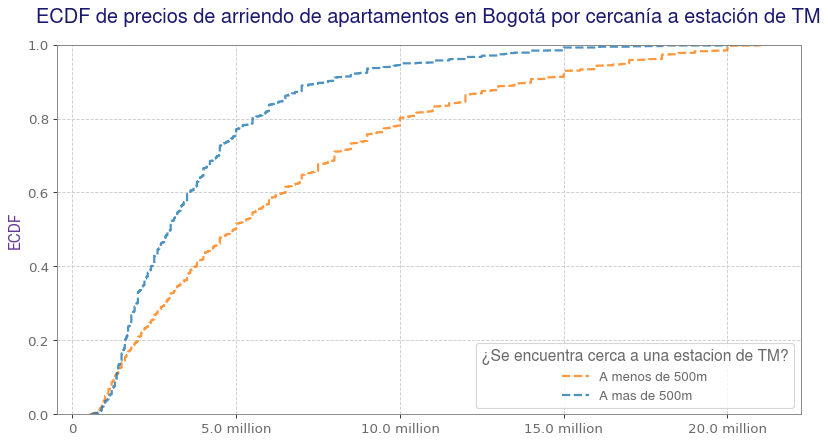

In [27]:
plt.figure(figsize=(12, 6))

sns.ecdfplot(
    apartments,
    x='precio_arriendo',
    hue='is_cerca_estacion_tm',
    hue_order=[True, False],
    alpha=.8,
    linewidth=2,
    linestyle='--',
    legend=True,
)

legend = plt.legend(['A menos de 500m', 'A mas de 500m'],
              title='¿Se encuentra cerca a una estacion de TM?',
              title_fontproperties={'family':'Nimbus Sans', 'size':'14'},
              prop={'family':'Nimbus Sans', 'size':'12'},
    )

legend.get_title().set_ha('center')
legend.get_title().set_color('dimgray')
legend.get_texts()[0].set_color('dimgray')
legend.get_texts()[1].set_color('dimgray')

plt.title('ECDF de precios de arriendo de apartamentos en Bogotá por cercanía a estación de TM',
            **title_font, pad=20)
plt.xlabel('', **subtitle_font)
plt.ylabel('ECDF', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.savefig('../visualizations/rent_apartments_by_is_cerca_estacion_tm_ecdf.png', bbox_inches='tight')
plt.show()

In [28]:
# stats de precio por localidad

stats_localidad = apartments.groupby('localidad')['precio_arriendo'].describe()
stats_localidad.sort_values(by='mean', ascending=False).applymap(humanize.intword).head()

,count,mean,std,min,25%,50%,75%,max
localidad,,,,,,,,
CHAPINERO,3.6 thousand,8.4 million,4.7 million,900.0 thousand,4.7 million,7.5 million,11.5 million,21.2 million
USAQUEN,2.8 thousand,5.6 million,4.1 million,650.0 thousand,2.7 million,4.2 million,7.0 million,21.0 million
SUBA,868,3.0 million,2.4 million,700.0 thousand,1.6 million,2.2 million,3.5 million,20.0 million
TEUSAQUILLO,196,2.7 million,1.8 million,850.0 thousand,1.8 million,2.3 million,3.0 million,16.5 million
CANDELARIA,43,2.4 million,3.0 million,780.0 thousand,1.4 million,1.9 million,2.4 million,21.0 million


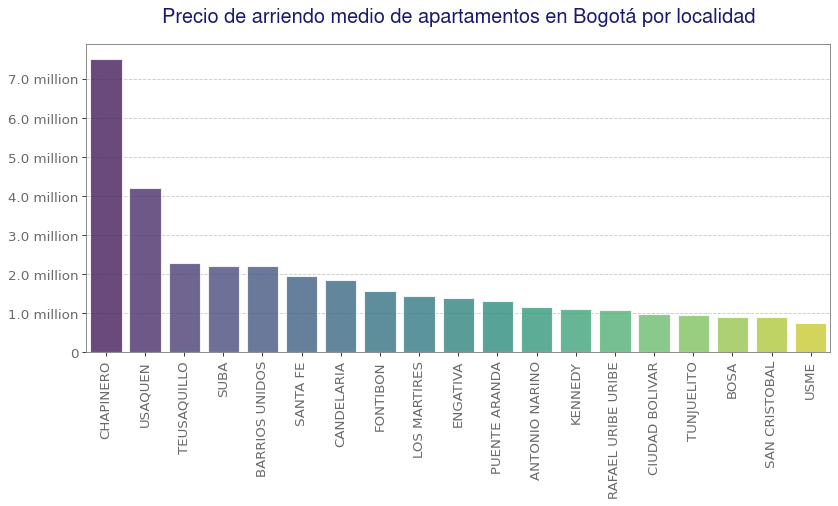

In [29]:
plt.figure(figsize=(12, 5))

sns.barplot(
    x=stats_localidad.index,
    y=stats_localidad['50%'],
    alpha=.8,
    order=stats_localidad.sort_values(by='50%', ascending=False).index,
    palette='viridis'
)

plt.title('Precio de arriendo medio de apartamentos en Bogotá por localidad',
            **title_font, pad=20)
plt.xlabel('', **subtitle_font)
plt.ylabel('', **subtitle_font)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.xticks(rotation=90, **text_font)
plt.yticks(**text_font)
plt.savefig('../visualizations/rent_apartments_by_localidad_median.png', bbox_inches='tight')
plt.show()

In [30]:
apartments.columns

Index(['codigo', 'tipo_propiedad', 'area', 'habitaciones', 'banos',
       'administracion', 'parqueaderos', 'sector', 'estrato', 'antiguedad',
       'latitud', 'longitud', 'direccion', 'descripcion', 'website',
       'last_view', 'datetime', 'url', 'timeline', 'estado', 'compañia',
       'precio_arriendo', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'piscina', 'salon_comunal', 'terraza', 'vigilancia', 'localidad',
       'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'parque_cercano', 'distancia_parque_m',
       'is_cerca_parque', 'month', 'month_name'],
      dtype='object')

# Analisis centrado en Suba

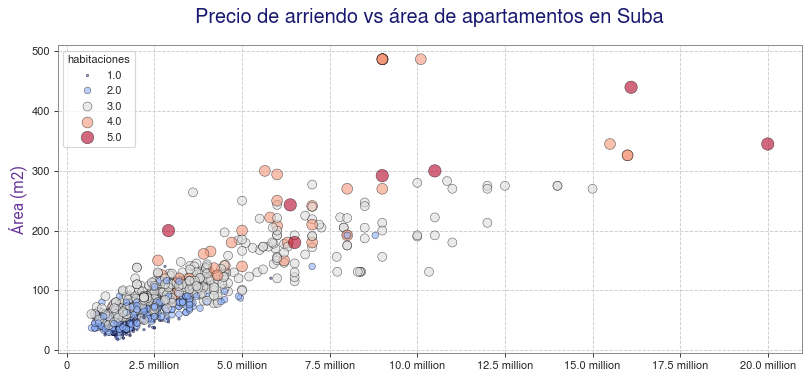

In [31]:
plt.figure(figsize=(12, 5))

sns.scatterplot(
    data=apartments.loc[apartments['localidad'] == 'SUBA'],
    x='precio_arriendo',
    y=apartments['area'].loc[(apartments['localidad'] == 'SUBA') & (apartments['area'] < 800) & (apartments['area'] > 0)],
    alpha=.6,
    hue='habitaciones',
    palette='coolwarm',
    size='habitaciones',
    sizes=(5, 125),
    legend='full',
    edgecolor='black',
    linewidth=.5,
    marker='o',
)

plt.title('Precio de arriendo vs área de apartamentos en Suba',
            **title_font, pad=20)
plt.xlabel('', **subtitle_font)
plt.ylabel('Área (m2)', **subtitle_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.show()

In [32]:
# Porcentaje de apartamentos cerca a un parque
round(apartments['is_cerca_parque'].value_counts(normalize=True) * 100, 2)


is_cerca_parque
0    70.24
1    29.76
Name: proportion, dtype: float64

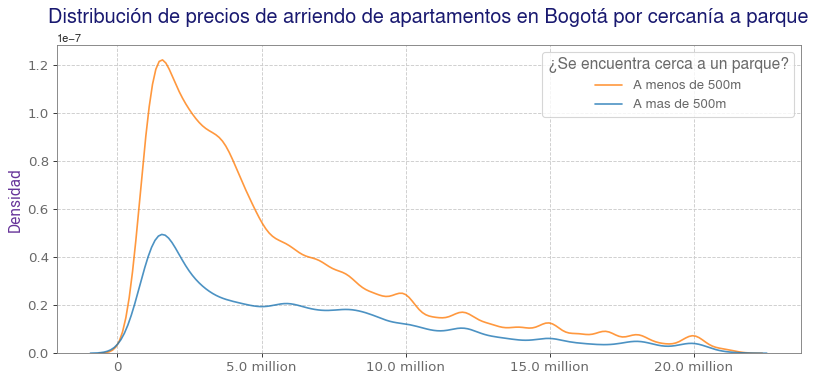

In [33]:
plt.figure(figsize=(12, 5))

sns.kdeplot(
    data=apartments,
    x='precio_arriendo',
    hue='is_cerca_parque',
    bw_adjust=.5,
    hue_order=[True, False],
    alpha=.8,
)

legend = plt.legend(['A menos de 500m', 'A mas de 500m'],
              title='¿Se encuentra cerca a un parque?',
              title_fontproperties={'family':'Nimbus Sans', 'size':'14'},
              prop={'family':'Nimbus Sans', 'size':'12'},
    )

legend.get_title().set_ha('center')
legend.get_title().set_color('dimgray')
legend.get_texts()[0].set_color('dimgray')
legend.get_texts()[1].set_color('dimgray')

plt.title('Distribución de precios de arriendo de apartamentos en Bogotá por cercanía a parque',
            **title_font, pad=20)
plt.xlabel('', **subtitle_font)
plt.ylabel('Densidad', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
#plt.savefig('../visualizations/rent_apartments_by_is_cerca_parque.png', bbox_inches='tight')
plt.show()


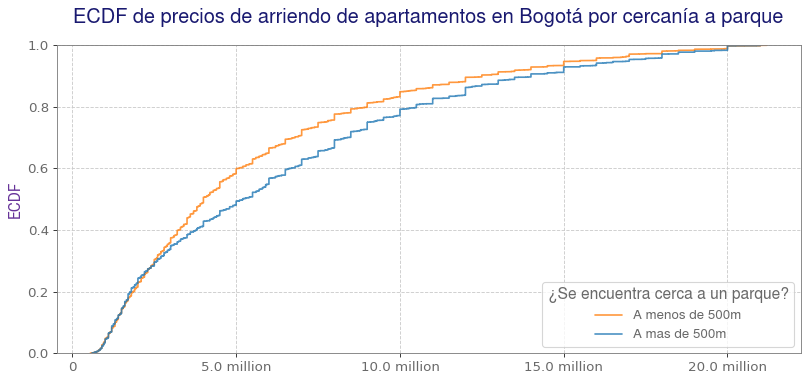

In [34]:
plt.figure(figsize=(12, 5))

sns.ecdfplot(
    apartments,
    x='precio_arriendo',
    hue='is_cerca_parque',
    hue_order=[True, False],
    alpha=.8,
)

legend = plt.legend(['A menos de 500m', 'A mas de 500m'],
                title='¿Se encuentra cerca a un parque?',
                title_fontproperties={'family':'Nimbus Sans', 'size':'14'},
                prop={'family':'Nimbus Sans', 'size':'12'},
                loc='lower right',
        )

legend.get_title().set_ha('center')
legend.get_title().set_color('dimgray')
legend.get_texts()[0].set_color('dimgray')
legend.get_texts()[1].set_color('dimgray')


plt.title('ECDF de precios de arriendo de apartamentos en Bogotá por cercanía a parque',
            **title_font, pad=20)
plt.xlabel('', **subtitle_font)
plt.ylabel('ECDF', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.savefig('../visualizations/rent_apartments_by_is_cerca_parque_ecdf.png', bbox_inches='tight')
plt.show()

In [35]:
# Precio medio de arriendo por distancia a estación de TM
bins = np.arange(min(apartments['distancia_estacion_tm_m']), max(apartments['distancia_estacion_tm_m']), 100)
apartments['distancia_estacion_tm_m_bins'] = pd.cut(apartments['distancia_estacion_tm_m'], bins=bins)
apartments_by_distancia_estacion_tm = apartments.groupby('distancia_estacion_tm_m_bins')['precio_arriendo'].describe()
apartments_by_distancia_estacion_tm.applymap(humanize.intword).head()

,count,mean,std,min,25%,50%,75%,max
distancia_estacion_tm_m_bins,,,,,,,,
"(1.36, 101.36]",79,2.5 million,1.5 million,650.0 thousand,1.4 million,2.0 million,3.2 million,9.0 million
"(101.36, 201.36]",247,3.6 million,2.5 million,886.0 thousand,2.0 million,2.9 million,4.2 million,18.0 million
"(201.36, 301.36]",409,3.8 million,2.9 million,600.0 thousand,1.7 million,3.0 million,4.6 million,16.1 million
"(301.36, 401.36]",541,4.2 million,3.3 million,600.0 thousand,1.8 million,3.0 million,5.5 million,20.0 million
"(401.36, 501.36]",524,4.1 million,3.4 million,780.0 thousand,1.8 million,3.0 million,5.0 million,21.0 million


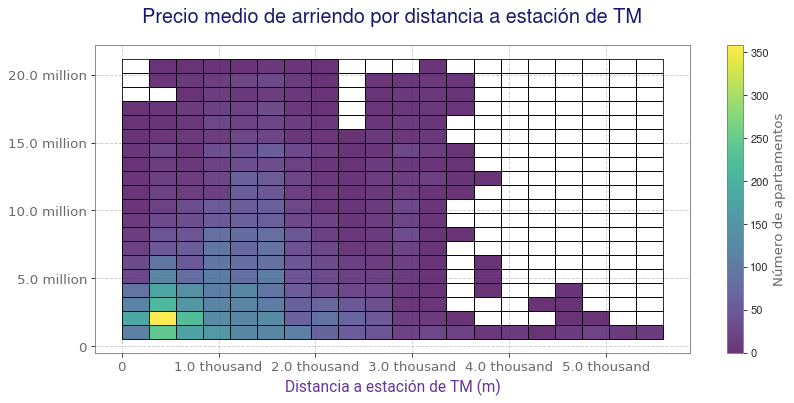

In [36]:
# Graficar el precio medio de arriendo por distancia a estación de TM
plt.figure(figsize=(12, 5))

hist = sns.histplot(
    data=apartments,
    x='distancia_estacion_tm_m',
    y='precio_arriendo',
    bins=20,
    alpha=.8,
    edgecolor='black',
    linewidth=.5,
    legend=True,
    cmap='viridis',
)

cbar = hist.figure.colorbar(hist.collections[0])
cbar.set_label('Número de apartamentos', **text_font)



plt.title('Precio medio de arriendo por distancia a estación de TM', **title_font, pad=20)
plt.xlabel('Distancia a estación de TM (m)', **subtitle_font)
plt.ylabel('', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
#plt.savefig('../visualizations/rent_apartments_by_distancia_estacion_tm.png', bbox_inches='tight')
plt.show()

In [37]:
# Filtrar por apartamentos que tengan distancia a estación de TM menor a 1000m
apartments_cerca_estacion_tm = apartments.loc[apartments['distancia_estacion_tm_m'] < 1000]
apartments_cerca_estacion_tm.shape

(3829, 45)

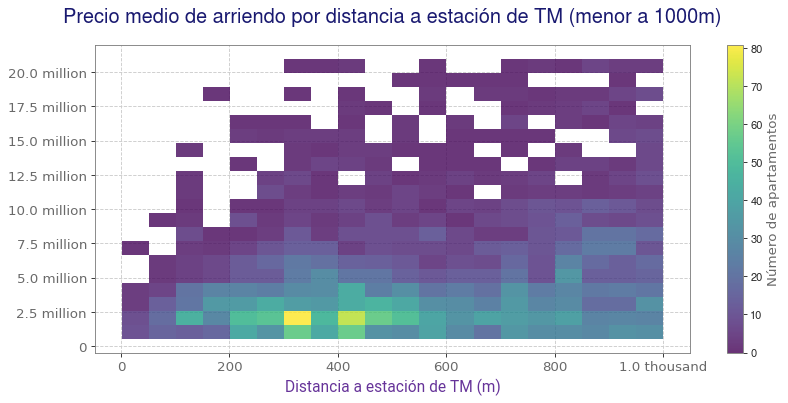

In [38]:
# Graficar el precio medio de arriendo por distancia a estación de TM para distancias menores a 1000m
plt.figure(figsize=(12, 5))

hist = sns.histplot(
    data=apartments_cerca_estacion_tm,
    x='distancia_estacion_tm_m',
    y='precio_arriendo',
    bins=20,
    cmap='viridis',
    alpha=.8,
)

cbar = hist.figure.colorbar(hist.collections[0])
cbar.set_label('Número de apartamentos', **text_font)

plt.title('Precio medio de arriendo por distancia a estación de TM (menor a 1000m)',
            **title_font, pad=20)
plt.xlabel('Distancia a estación de TM (m)', **subtitle_font)
plt.ylabel('', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
#plt.savefig('../visualizations/rent_apartments_by_distancia_estacion_tm_cerca.png', bbox_inches='tight')
plt.show()


In [39]:
# Filtrar de entre los apartamentos que estén cerca de una estación de TM, los que tengan un precio de arriendo menor a 3M
apartments_cerca_estacion_tm_bajo_precio = apartments_cerca_estacion_tm.loc[apartments_cerca_estacion_tm['precio_arriendo'] < 3000000]
apartments_cerca_estacion_tm_bajo_precio.shape

(1666, 45)

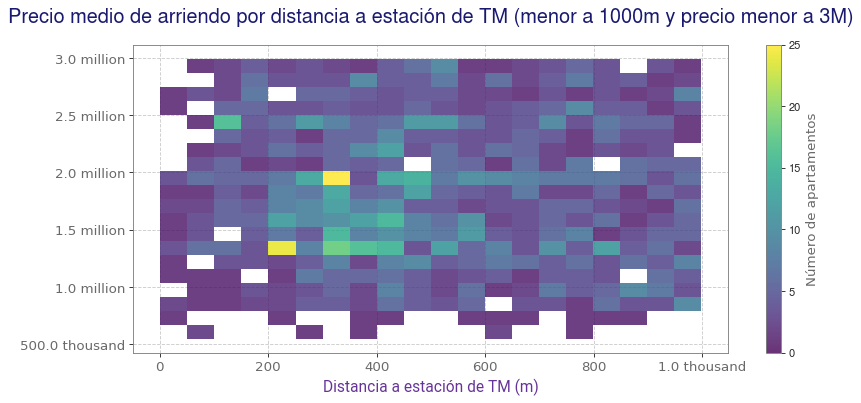

In [40]:
plt.figure(figsize=(12, 5))

hist = sns.histplot(
    data=apartments_cerca_estacion_tm_bajo_precio,
    x='distancia_estacion_tm_m',
    y='precio_arriendo',
    bins=20,
    cmap='viridis',
    alpha=.8,
)

cbar = hist.figure.colorbar(hist.collections[0])
cbar.set_label('Número de apartamentos', **text_font)

plt.title('Precio medio de arriendo por distancia a estación de TM (menor a 1000m y precio menor a 3M)',
            **title_font, pad=20)
plt.xlabel('Distancia a estación de TM (m)', **subtitle_font)
plt.ylabel('', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
#plt.savefig('../visualizations/rent_apartments_by_distancia_estacion_tm_cerca_bajo_precio.png', bbox_inches='tight')
plt.show()

In [41]:
apartments['precio_por_habitacion'] = apartments['precio_arriendo'] / apartments['habitaciones']
bins = np.arange(min(apartments_cerca_estacion_tm['distancia_estacion_tm_m']), max(apartments_cerca_estacion_tm['distancia_estacion_tm_m']), 100)
apartments_cerca_estacion_tm['precio_por_habitaciones'] = apartments_cerca_estacion_tm['precio_arriendo'] / apartments_cerca_estacion_tm['habitaciones']
apartments_cerca_estacion_tm['distancia_estacion_tm_m_bins'] = pd.cut(apartments_cerca_estacion_tm['distancia_estacion_tm_m'], bins=bins)
apartments_by_distancia_estacion_tm = apartments_cerca_estacion_tm.groupby('distancia_estacion_tm_m_bins')['precio_por_habitaciones'].describe().applymap(humanize.intword)
apartments_by_distancia_estacion_tm.head()

,count,mean,std,min,25%,50%,75%,max
distancia_estacion_tm_m_bins,,,,,,,,
"(1.36, 101.36]",79,1.5 million,962.3 thousand,300.0 thousand,751.2 thousand,1.5 million,2.1 million,6.0 million
"(101.36, 201.36]",247,1.7 million,943.4 thousand,366.7 thousand,1.1 million,1.6 million,2.2 million,7.5 million
"(201.36, 301.36]",409,1.9 million,1.1 million,200.0 thousand,1.1 million,1.6 million,2.5 million,5.8 million
"(301.36, 401.36]",541,2.0 million,1.3 million,283.3 thousand,1.2 million,1.8 million,2.6 million,15.0 million
"(401.36, 501.36]",523,+Inf,NaN,300.0 thousand,1.0 million,1.8 million,2.6 million,+Inf


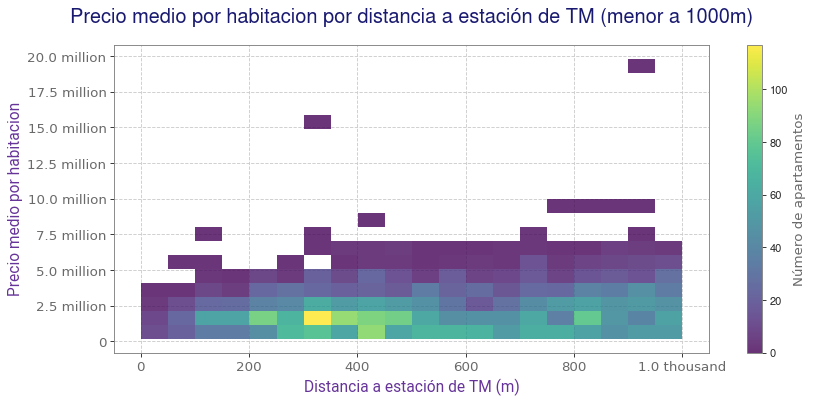

In [42]:
plt.figure(figsize=(12, 5))

hist = sns.histplot(
    data=apartments_cerca_estacion_tm,
    x='distancia_estacion_tm_m',
    y='precio_por_habitaciones',
    bins=20,
    cmap='viridis',
    alpha=.8,
)

cbar = hist.figure.colorbar(hist.collections[0])
cbar.set_label('Número de apartamentos', **text_font)

plt.title('Precio medio por habitacion por distancia a estación de TM (menor a 1000m)',
            **title_font, pad=20)
plt.xlabel('Distancia a estación de TM (m)', **subtitle_font)
plt.ylabel('Precio medio por habitacion', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
#plt.savefig('../visualizations/rent_apartments_by_distancia_estacion_tm_cerca_precio_por_bano.png', bbox_inches='tight')
plt.show()

In [43]:
# Filtrar de entre los apartamentos que estén cerca de una estación de TM, los que tengan un precio por habitación menor a 1.2M
apartments_cerca_estacion_tm_bajo_precio_por_habitacion = apartments_cerca_estacion_tm.loc[apartments_cerca_estacion_tm['precio_por_habitaciones'] < 1200000]
apartments_cerca_estacion_tm_bajo_precio_por_habitacion.shape

(1086, 46)

In [44]:
apartments_cerca_estacion_tm_bajo_precio_por_habitacion.groupby('distancia_estacion_tm_m_bins')['precio_por_habitaciones'].describe().applymap(humanize.intword).head()


,count,mean,std,min,25%,50%,75%,max
distancia_estacion_tm_m_bins,,,,,,,,
"(1.36, 101.36]",30,626.2 thousand,224.4 thousand,300.0 thousand,427.1 thousand,650.0 thousand,827.5 thousand,1.0 million
"(101.36, 201.36]",66,811.7 thousand,206.2 thousand,366.7 thousand,650.0 thousand,836.5 thousand,979.2 thousand,1.2 million
"(201.36, 301.36]",116,765.2 thousand,253.3 thousand,200.0 thousand,562.5 thousand,716.7 thousand,1.0 million,1.2 million
"(301.36, 401.36]",134,732.4 thousand,244.8 thousand,283.3 thousand,519.6 thousand,714.3 thousand,933.3 thousand,1.2 million
"(401.36, 501.36]",151,757.6 thousand,230.3 thousand,300.0 thousand,555.0 thousand,750.0 thousand,950.0 thousand,1.2 million


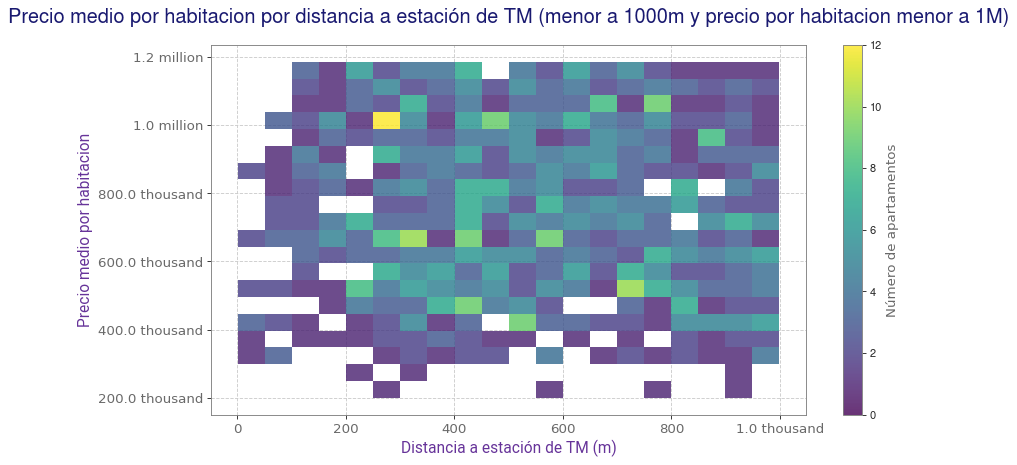

In [45]:
plt.figure(figsize=(12, 6))

hist = sns.histplot(
    data=apartments_cerca_estacion_tm_bajo_precio_por_habitacion,
    x='distancia_estacion_tm_m',
    y='precio_por_habitaciones',
    bins=20,
    cmap='viridis',
    alpha=.8,
)

cbar = hist.figure.colorbar(hist.collections[0])
cbar.set_label('Número de apartamentos', **text_font)

plt.title('Precio medio por habitacion por distancia a estación de TM (menor a 1000m y precio por habitacion menor a 1M)',
            **title_font, pad=20)
plt.xlabel('Distancia a estación de TM (m)', **subtitle_font)
plt.ylabel('Precio medio por habitacion', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
#plt.savefig('../visualizations/rent_apartments_by_distancia_estacion_tm_cerca_precio_por_bano_bajo.png', bbox_inches='tight')
plt.show()

# Añadir información de hurtos por localidad

In [46]:
hurtos_localidad = pd.read_csv('../data/external/hurtos_bogota/hurtos_por_localidad.csv', sep=',', encoding='utf-16')
hurtos_localidad.head()

,localidad,hurtos_julio_2024
0,11-SUBA,725
1,08-KENNEDY,683
2,10-ENGATIVÁ,785
3,02-CHAPINERO,604
4,13-TEUSAQUILLO,440


In [47]:
# Convertir de formato "01-USAQUÉN" a "USAQUEN" removiendo el número, el guión y las tildes
hurtos_localidad['localidad'] = hurtos_localidad['localidad'].str.split('-', expand=True)[1].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# Remover Localidades "SIN LOCALIZACION"
hurtos_localidad = hurtos_localidad.loc[hurtos_localidad['localidad'] != 'SIN LOCALIZACION']
# Convertir datos en "hurtos_localidad_primeros_7_meses_2024" a int
hurtos_localidad['hurtos_julio_2024'] = hurtos_localidad['hurtos_julio_2024'].astype(int)
hurtos_localidad.head()

,localidad,hurtos_julio_2024
0,SUBA,725
1,KENNEDY,683
2,ENGATIVA,785
3,CHAPINERO,604
4,TEUSAQUILLO,440


In [48]:
# Importar datos de población por localidad
poblacion_localidad = pd.read_csv('../data/external/localidades_bogota/Poblacion_por_Localidad_2024.csv', sep=',', encoding='utf-8')
poblacion_localidad.head()

,localidad,poblacion
0,Antonio Nariño,84979
1,Barrios Unidos,156268
2,Bosa,733740
3,Chapinero,182103
4,Ciudad Bolívar,666809


In [49]:
# Convertir nombres de localidades a mayúsculas sin tildes
poblacion_localidad['localidad'] = poblacion_localidad['localidad'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.upper()
# Cambiar nombre de localidad "LA CANDELARIA" por "CANDELARIA"
poblacion_localidad['localidad'] = poblacion_localidad['localidad'].replace('LA CANDELARIA', 'CANDELARIA')

# Merge de hurtos_localidad y poblacion_localidad
hurtos_localidad_poblacion = hurtos_localidad.merge(poblacion_localidad, on='localidad')
hurtos_localidad_poblacion['hurtos_por_1000_hab'] = hurtos_localidad_poblacion['hurtos_julio_2024'] / hurtos_localidad_poblacion['poblacion'] * 1000

hurtos_localidad_poblacion.head()

,localidad,hurtos_julio_2024,poblacion,hurtos_por_1000_hab
0,SUBA,725,1313453,0.551980
1,KENNEDY,683,1037929,0.658041
2,ENGATIVA,785,819441,0.957970
3,CHAPINERO,604,182103,3.316804
4,TEUSAQUILLO,440,165438,2.659607


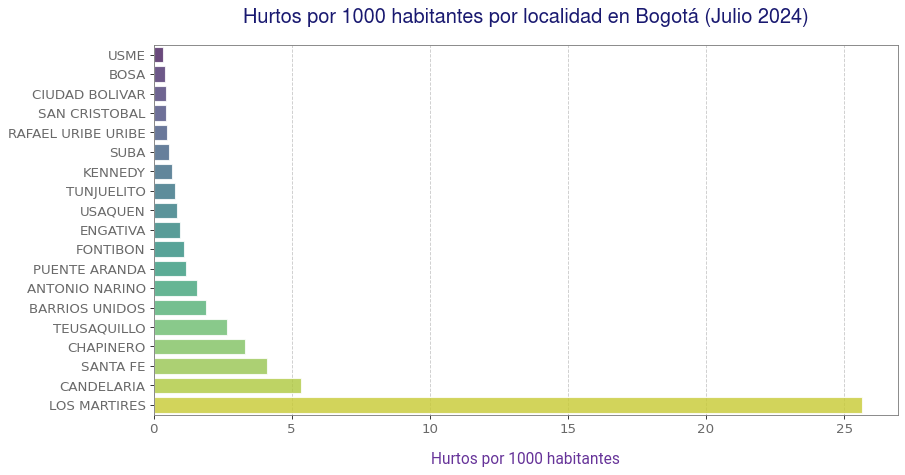

In [50]:
# Graficar localidades mas seguras
plt.figure(figsize=(12, 6))

sns.barplot(
    x='hurtos_por_1000_hab',
    y='localidad',
    data=hurtos_localidad_poblacion.sort_values(by='hurtos_por_1000_hab', ascending=True),
    palette='viridis',
    alpha=.8,
)

plt.title('Hurtos por 1000 habitantes por localidad en Bogotá (Julio 2024)', 
            **title_font, pad=20)
plt.xlabel('Hurtos por 1000 habitantes', **subtitle_font, labelpad=15)
plt.ylabel('', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.savefig('../visualizations/hurtos_por_1000_hab_por_localidad.png', bbox_inches='tight')
plt.show()

In [51]:
apartments_extended = apartments.merge(hurtos_localidad_poblacion, on='localidad')
apartments_extended.head()

,codigo,tipo_propiedad,area,habitaciones,banos,administracion,parqueaderos,sector,estrato,antiguedad,...,parque_cercano,distancia_parque_m,is_cerca_parque,month,month_name,distancia_estacion_tm_m_bins,precio_por_habitacion,hurtos_julio_2024,poblacion,hurtos_por_1000_hab
0,MC5214856,APARTAMENTO,106.0,3.0,2.0,560000.0,2.0,COLINA Y ALREDEDORES,4.0,ENTRE 5 Y 10 ANOS,...,PARQUE VECINAL AGRUPACIÓN DE VIVIENDA EN BALCO...,1169.15,0,9,Septiembre,"(201.36, 301.36]",1.033333e+06,725,1313453,0.551980
1,MC5226855,APARTAMENTO,70.0,3.0,2.0,300000.0,1.0,SALITRE MODELIA,4.0,MAS DE 20 ANOS,...,PARQUE VECINAL CARLOS LLERAS (EL FUEGO),205.51,1,9,Septiembre,"(601.36, 701.36]",6.500000e+05,444,408155,1.087822
2,MC5224821,APARTAMENTO,44.5,1.0,1.0,391000.0,1.0,SANTA BARBARA,6.0,ENTRE 10 Y 20 ANOS,...,PARQUE METROPOLITANO EL COUNTRY,1714.01,0,9,Septiembre,"(1501.36, 1601.36]",2.590000e+06,512,594611,0.861067
3,MC3587458,APARTAMENTO,43.0,1.0,1.0,NaN,1.0,LA SOLEDAD,4.0,ENTRE 0 Y 5 ANOS,...,PARQUE METROPOLITANO EL RENACIMIENTO - PARQUE ...,445.06,1,9,Septiembre,"(101.36, 201.36]",2.200000e+06,440,165438,2.659607
4,15234-M5227729,APARTAMENTO,212.0,4.0,4.0,NaN,2.0,CHICO,6.0,MAS DE 20 ANOS,...,PARQUE VECINAL URBANIZACIÓN LA CABRERA,494.38,1,9,Septiembre,"(1401.36, 1501.36]",3.250000e+06,604,182103,3.316804


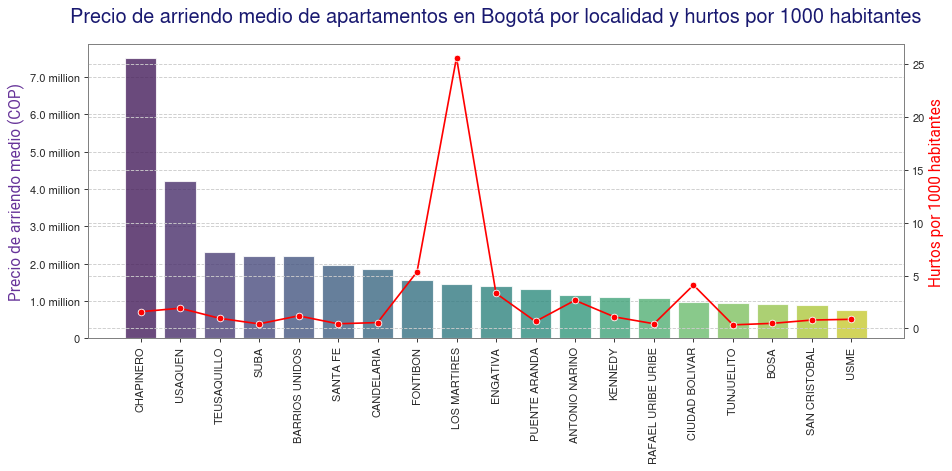

In [52]:
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras para la media del precio de arriendo por localidad
ax1 = sns.barplot(
    x=stats_localidad.index,
    y=stats_localidad['50%'],
    palette='viridis',
    alpha=.8,
    order=stats_localidad.sort_values(by='50%', ascending=False).index,
)


# Configurar las etiquetas y el título
ax1.set_title('Precio de arriendo medio de apartamentos en Bogotá por localidad y hurtos por 1000 habitantes',
                **title_font, pad=20)
ax1.set_xlabel('', **subtitle_font)
ax1.set_ylabel('Precio de arriendo medio (COP)', **subtitle_font)
# Formatear los ticks del eje Y para que se muestren en formato humano
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
# plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)



# Crear un segundo eje Y para los hurtos por 1000 habitantes
ax2 = ax1.twinx()

# Obtener las localidades en el mismo orden que en el gráfico de barras
localidades_ordenadas = apartments['localidad'].value_counts().index

# Graficar la línea de hurtos en el segundo eje Y
sns.lineplot(
    x=localidades_ordenadas, 
    y=hurtos_localidad_poblacion.groupby('localidad')['hurtos_por_1000_hab'].mean(),
    color='red', 
    marker='o', 
    ax=ax2
)

# Configurar el segundo eje Y para los hurtos
subtitle_font_red = subtitle_font.copy()
subtitle_font_red['color'] = 'red'
ax2.set_ylabel('Hurtos por 1000 habitantes', **subtitle_font_red)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [53]:
# Ordenar las localidades por la mediana del precio de arriendo
localidades_ordenadas = apartments.groupby('localidad')['precio_arriendo'].median().sort_values(ascending=False).index

# Obtener los valores de hurtos por mil habitantes en el mismo orden de las localidades
hurto_values = hurtos_localidad_poblacion.set_index('localidad').loc[localidades_ordenadas, 'hurtos_por_1000_hab']

norm = plt.Normalize(hurto_values.min(), hurto_values.max())

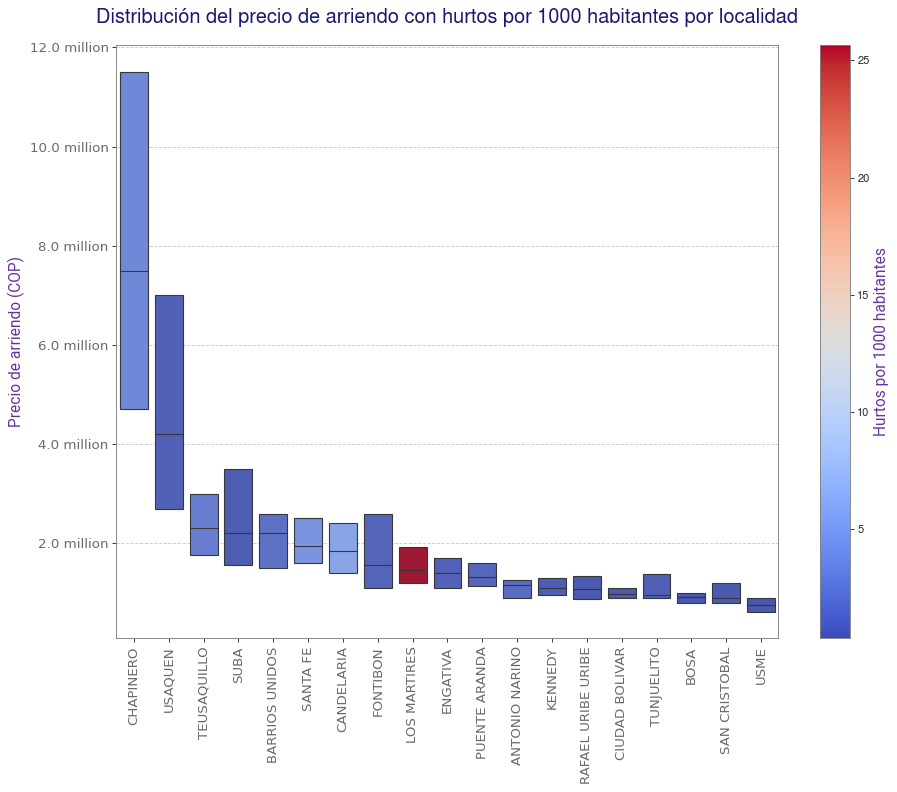

In [54]:
# Crear la figura
plt.figure(figsize=(12, 10))


# Probar diferentes paletas de colores
# Puedes cambiar 'YlOrRd', 'coolwarm', 'viridis', 'cividis' para ver cuál te gusta más
palette_name = 'coolwarm'  # Cambia a 'coolwarm', 'viridis', 'cividis', etc.

# Crear una paleta de colores basada en los valores de hurtos
sm = plt.cm.ScalarMappable(cmap=palette_name, norm=norm)
sm.set_array([])

# Crear una lista de colores para las localidades basados en los valores de hurtos
colors = [plt.cm.get_cmap(palette_name)(norm(value)) for value in hurto_values]

# Graficar el boxplot y asignar los colores
ax = sns.boxplot(
    x='localidad', 
    y='precio_arriendo', 
    data=apartments,
    palette=colors,  # Asignar colores en función de los hurtos
    order=localidades_ordenadas,
    whis=[25, 75],  # Cambiar los bigotes para que no se vean tan largos
    showfliers=False,
    showcaps=False,  # Ocultar las líneas de los extremos de los bigotes
)

# Agregar la barra de color
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Hurtos por 1000 habitantes', **subtitle_font)

# Configurar las etiquetas y el título
ax.set_title('Distribución del precio de arriendo con hurtos por 1000 habitantes por localidad',
                **title_font, pad=20)
ax.set_xlabel('', **subtitle_font)
ax.set_ylabel('Precio de arriendo (COP)', **subtitle_font)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, **text_font)
ax.set_yticklabels(ax.get_yticks(), **text_font)

# Ajustar el formato del eje Y para mejorar la legibilidad (en millones)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('../visualizations/rent_apartments_by_localidad_hurtos_colored.png', bbox_inches='tight')
plt.show()


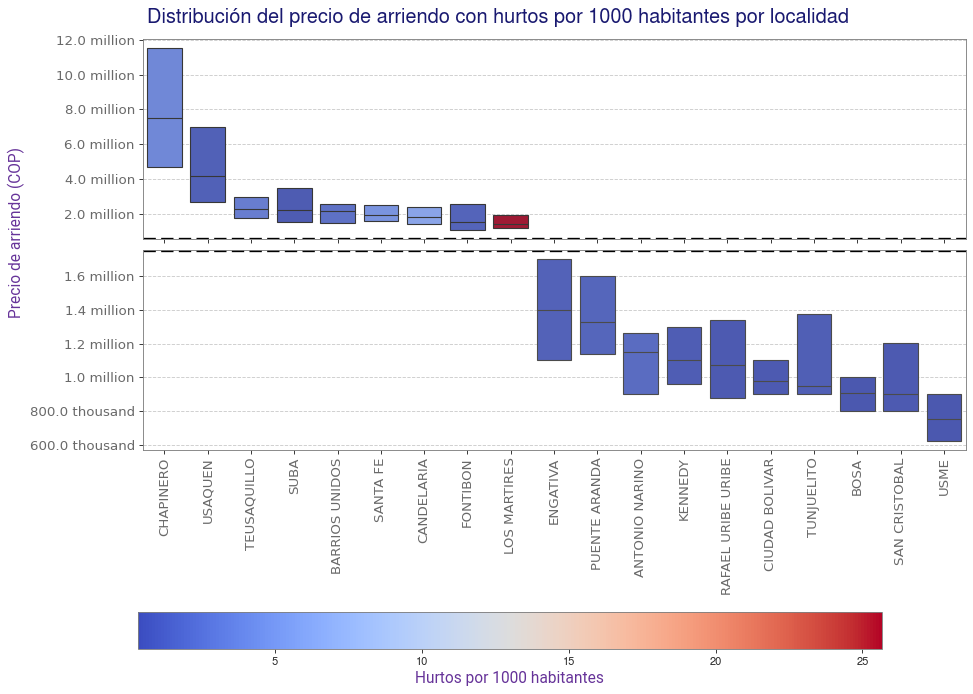

In [55]:
# Crear la figura con dos subgráficos verticales
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)


# Probar diferentes paletas de colores
palette_name = 'coolwarm'  # Cambia a 'coolwarm', 'viridis', 'cividis', etc.

# Crear una paleta de colores basada en los valores de hurtos
sm = plt.cm.ScalarMappable(cmap=palette_name, norm=norm)
sm.set_array([])

# Crear una lista de colores para las localidades basados en los valores de hurtos
colors = [plt.cm.get_cmap(palette_name)(norm(value)) for value in hurto_values]

# Dividir las localidades en dos grupos: las de precios más altos y las de precios más bajos
n = len(localidades_ordenadas) // 2  # Dividimos las localidades en dos grupos
localidades_top = localidades_ordenadas[:n]   # Primeras n localidades (más caras)
localidades_bottom = localidades_ordenadas[n:]  # Últimas n localidades (más económicas)

# Graficar el boxplot para las localidades con precios más altos (arriba)
sns.boxplot(
    x='localidad', 
    y='precio_arriendo', 
    data=apartments[apartments['localidad'].isin(localidades_top)],
    palette=colors[:n],  # Asignar colores en función de los hurtos
    order=localidades_top,
    whis=[25, 75],  # Cambiar los bigotes para que no se vean tan largos
    showfliers=False,
    showcaps=False,  # Ocultar las líneas de los extremos de los bigotes
    ax=ax1
)

# Graficar el boxplot para las localidades con precios más bajos (abajo)
sns.boxplot(
    x='localidad', 
    y='precio_arriendo', 
    data=apartments[apartments['localidad'].isin(localidades_bottom)],
    palette=colors[n:],  # Asignar colores en función de los hurtos
    order=localidades_bottom,
    whis=[25, 75],  # Cambiar los bigotes para que no se vean tan largos
    showfliers=False,
    showcaps=False,  # Ocultar las líneas de los extremos de los bigotes
    ax=ax2
)

# Configurar el eje X solo en el gráfico inferior
ax2.set_xlabel('')
# Configurar unico label para ambos ejes Y
fig.text(-0.01, 0.7, 'Precio de arriendo (COP)', va='center',
         rotation='vertical', **subtitle_font)
ax1.set_ylabel('')
ax2.set_ylabel('')

ax1.set_yticklabels(ax1.get_yticks(), **text_font)
ax2.set_yticklabels(ax2.get_yticks(), **text_font)
# Rotar las etiquetas del eje X en el gráfico inferior
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, **text_font)

# Ajustar el formato del eje Y para mejorar la legibilidad (en millones)
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
ax2.get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

# Agregar una línea horizontal entre los dos subgráficos para destacar el cambio de escala
fig.subplots_adjust(hspace=0.05)  # Ajustar el espacio entre subgráficos
ax1.axhline(y=ax1.get_ylim()[0], color='black', linestyle='--', linewidth=3)
ax2.axhline(y=ax2.get_ylim()[1], color='black', linestyle='--', linewidth=3)

# Agregar la barra de color
cbar = plt.colorbar(sm, ax=[ax1, ax2], orientation='horizontal', pad=-0.45)
cbar.set_label('Hurtos por 1000 habitantes', **subtitle_font)

# Configurar el título
fig.suptitle('Distribución del precio de arriendo con hurtos por 1000 habitantes por localidad',
                **title_font)

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('../visualizations/rent_apartments_by_localidad_hurtos_colored_split.png', bbox_inches='tight')
plt.show()


In [56]:
# Calcular el precio medio del arriendo por localidad
precio_medio_localidad = apartments.groupby('localidad')['precio_arriendo'].median()

# Obtener los valores de hurtos por mil habitantes por localidad
hurtos_por_localidad = hurtos_localidad_poblacion.set_index('localidad')['hurtos_por_1000_hab']

# Ordenar las localidades según los hurtos por mil habitantes
localidades_ordenadas = hurtos_por_localidad.sort_values().index

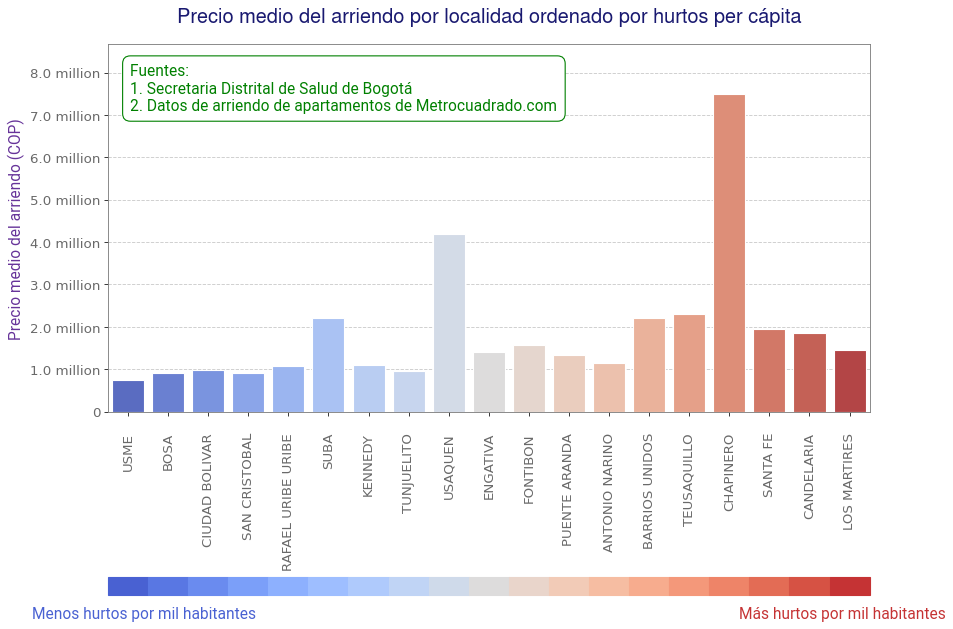

In [57]:
# Crear la figura con un solo eje
fig, ax1 = plt.subplots(figsize=(12, 8))

# Usar la misma paleta para las barras y la barra indicadora
palette = sns.color_palette("coolwarm", len(localidades_ordenadas))

# Graficar el gráfico de barras ordenado por hurtos en el eje principal
sns.barplot(
    x=localidades_ordenadas, 
    y=precio_medio_localidad.loc[localidades_ordenadas], 
    palette=palette,  # Usar la paleta
    ax=ax1,
)

# Etiquetas y título para el gráfico principal
ax1.set_title('Precio medio del arriendo por localidad ordenado por hurtos per cápita',
              **title_font, pad=20)
ax1.set_ylabel('Precio medio del arriendo (COP)', **subtitle_font)
ax1.set_xlabel('', **subtitle_font)
ax1.set_yticklabels(ax1.get_yticks(), **text_font)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, **text_font)

# Formato del eje Y para mostrar en millones
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

# Ajustar los límites del gráfico para dejar espacio para la barra debajo
ax1.set_ylim([0, ax1.get_ylim()[1] * 1.1])

# Dibujar la barra indicadora con colores divididos por localidad
for i, loc in enumerate(localidades_ordenadas):
    # Dividir la barra en segmentos con el mismo color de la paleta de las barras
    rect = patches.Rectangle(
        (i / len(localidades_ordenadas), -0.5),  # Inicio de cada segmento
        1 / len(localidades_ordenadas),  # Ancho de cada segmento
        0.05,  # Altura de la barra
        transform=ax1.transAxes,  # Usar coordenadas de los ejes
        color=palette[i],  # Color basado en la paleta
        clip_on=False,
    )
    ax1.add_patch(rect)

# Crear fuentes personalizadas para las etiquetas de la barra indicadora
menos_hurtos = subtitle_font.copy()
menos_hurtos['color'] = palette[0]  # Usar el color más frío de la paleta

mas_hurtos = subtitle_font.copy()
mas_hurtos['color'] = palette[-1]  # Usar el color más cálido de la paleta

verde_nota = subtitle_font.copy()
verde_nota['color'] = 'green'

# Añadir una etiqueta de escala "Menos hurtos por mil habitantes" a la izquierda
ax1.text(
    -0.1, -0.55, 
    'Menos hurtos por mil habitantes', 
    ha='left', 
    va='center',
    transform=ax1.transAxes,
    **menos_hurtos
)

# Añadir una etiqueta de escala "Más hurtos por mil habitantes" a la derecha
ax1.text(
    1.1, -0.55, 
    'Más hurtos por mil habitantes', 
    ha='right', 
    va='center',
    transform=ax1.transAxes,
    **mas_hurtos
)

# Mover las etiquetas del eje X hacia arriba para que haya espacio
ax1.xaxis.set_tick_params(pad=15)

# Ajustar el espaciado para dejar más espacio en la parte inferior
plt.subplots_adjust(bottom=0.3)

fig.text(
    0.14, 0.82, 
    'Fuentes: \n1. Secretaria Distrital de Salud de Bogotá\n2. Datos de arriendo de apartamentos de Metrocuadrado.com',
    ha='left', **verde_nota,
    bbox=dict(facecolor='white', edgecolor='green', boxstyle='round,pad=0.5')
)

# Aplicar un layout ajustado para evitar recortes
plt.tight_layout()

# Guardar la visualización
plt.savefig('../visualizations/rent_apartments_by_localidad_hurtos_colored_scale.svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


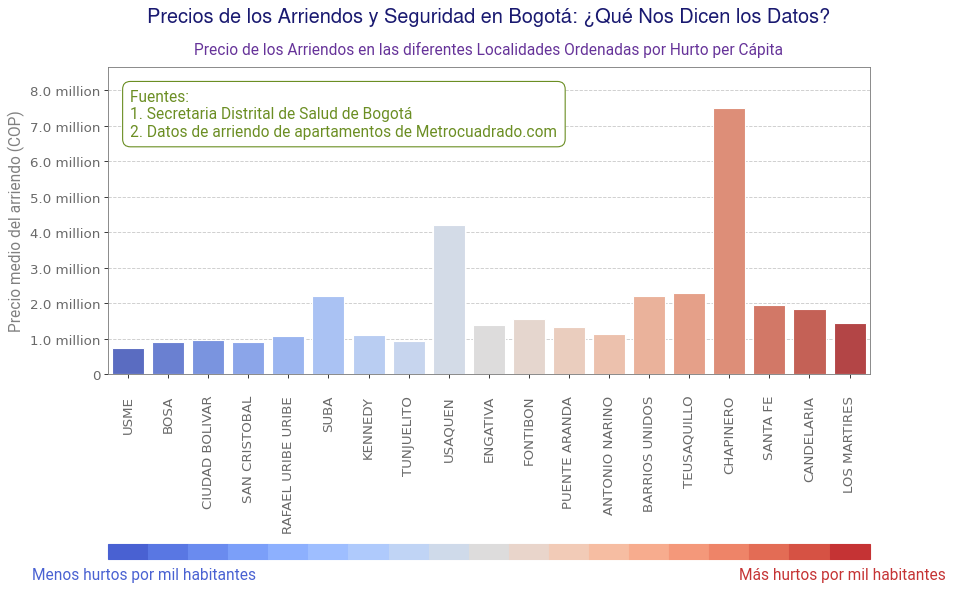

In [58]:
# Crear la figura con un solo eje
fig, ax1 = plt.subplots(figsize=(12, 8))

# Usar la misma paleta para las barras y la barra indicadora
palette = sns.color_palette("coolwarm", len(localidades_ordenadas))

# Graficar el gráfico de barras ordenado por hurtos en el eje principal
sns.barplot(
    x=localidades_ordenadas, 
    y=precio_medio_localidad.loc[localidades_ordenadas], 
    palette=palette,  # Usar la paleta
    ax=ax1,
)

# Configurar el título y subtítulo
title = 'Precios de los Arriendos y Seguridad en Bogotá: ¿Qué Nos Dicen los Datos?'
subtitle = 'Precio de los Arriendos en las diferentes Localidades Ordenadas por Hurto per Cápita'

# Fuentes personalizadas
title_font_improved = title_font.copy()
title_font_improved['fontweight'] = 'bold'
title_font_improved['color'] = 'darkblue'

subtitle_font_improved = subtitle_font.copy()
subtitle_font_improved['color'] = 'gray'


# Aplicar el título y subtítulo
ax1.set_title(title, fontdict=title_font, pad=40)
ax1.text(0.5, 1.039, subtitle, ha='center', va='baseline', transform=ax1.transAxes, fontdict=subtitle_font)

# Etiquetas para los ejes
ax1.set_ylabel('Precio medio del arriendo (COP)', **subtitle_font_improved)
ax1.set_xlabel('', **subtitle_font)
ax1.set_yticklabels(ax1.get_yticks(), **text_font)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, **text_font)

# Formato del eje Y para mostrar en millones
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

# Ajustar los límites del gráfico para dejar espacio para la barra debajo
ax1.set_ylim([0, ax1.get_ylim()[1] * 1.1])

# Dibujar la barra indicadora con colores divididos por localidad
for i, loc in enumerate(localidades_ordenadas):
    rect = patches.Rectangle(
        (i / len(localidades_ordenadas), -0.6),  # Inicio de cada segmento
        1 / len(localidades_ordenadas),  # Ancho de cada segmento
        0.05,  # Altura de la barra
        transform=ax1.transAxes,  # Usar coordenadas de los ejes
        color=palette[i],  # Color basado en la paleta
        clip_on=False,
    )
    ax1.add_patch(rect)

# Crear fuentes personalizadas para las etiquetas de la barra indicadora
menos_hurtos = subtitle_font.copy()
menos_hurtos['color'] = palette[0]  # Usar el color más frío de la paleta

mas_hurtos = subtitle_font.copy()
mas_hurtos['color'] = palette[-1]  # Usar el color más cálido de la paleta

verde_nota = subtitle_font.copy()
verde_nota['color'] = 'olivedrab'

# Añadir una etiqueta de escala "Menos hurtos por mil habitantes" a la izquierda
ax1.text(
    -0.1, -0.65, 
    'Menos hurtos por mil habitantes', 
    ha='left', 
    va='center',
    transform=ax1.transAxes,
    **menos_hurtos
)

# Añadir una etiqueta de escala "Más hurtos por mil habitantes" a la derecha
ax1.text(
    1.1, -0.65, 
    'Más hurtos por mil habitantes', 
    ha='right', 
    va='center',
    transform=ax1.transAxes,
    **mas_hurtos
)

# Mover las etiquetas del eje X hacia arriba para que haya espacio
ax1.xaxis.set_tick_params(pad=15)

# Ajustar el espaciado para dejar más espacio en la parte inferior
plt.subplots_adjust(bottom=0.3)

# Agregar las fuentes en la parte inferior en un cuadro blanco con borde verde
fig.text(
    0.14, 0.78, 
    'Fuentes: \n1. Secretaria Distrital de Salud de Bogotá\n2. Datos de arriendo de apartamentos de Metrocuadrado.com',
    ha='left', **verde_nota,
    bbox=dict(facecolor='white', edgecolor='olivedrab', boxstyle='round,pad=0.5')
)

# Aplicar un layout ajustado para evitar recortes
plt.tight_layout()

# Guardar la visualización
plt.savefig('../visualizations/rent_apartments_by_localidad_hurtos_colored_scale_improved.png', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


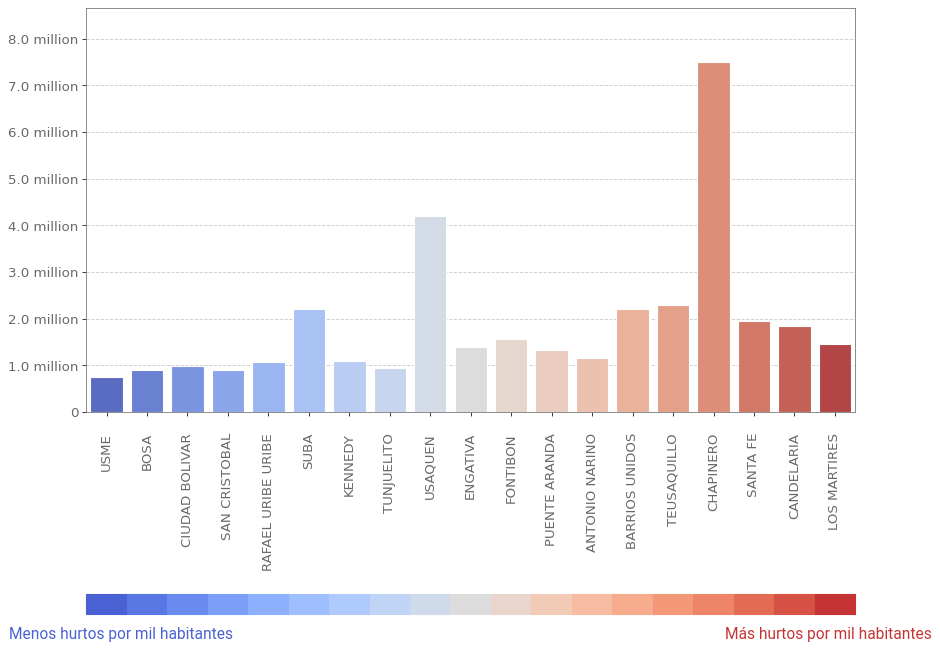

In [59]:
# Crear la figura con un solo eje
fig, ax1 = plt.subplots(figsize=(12, 8))

# Usar la misma paleta para las barras y la barra indicadora
palette = sns.color_palette("coolwarm", len(localidades_ordenadas))

# Graficar el gráfico de barras ordenado por hurtos en el eje principal
sns.barplot(
    x=localidades_ordenadas, 
    y=precio_medio_localidad.loc[localidades_ordenadas], 
    palette=palette,  # Usar la paleta
    ax=ax1,
)

ax1.set_yticklabels(ax1.get_yticks(), **text_font)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, **text_font)

# Formato del eje Y para mostrar en millones
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

# Ajustar los límites del gráfico para dejar espacio para la barra debajo
ax1.set_ylim([0, ax1.get_ylim()[1] * 1.1])

# Dibujar la barra indicadora con colores divididos por localidad
for i, loc in enumerate(localidades_ordenadas):
    rect = patches.Rectangle(
        (i / len(localidades_ordenadas), -0.5),  # Inicio de cada segmento
        1 / len(localidades_ordenadas),  # Ancho de cada segmento
        0.05,  # Altura de la barra
        transform=ax1.transAxes,  # Usar coordenadas de los ejes
        color=palette[i],  # Color basado en la paleta
        clip_on=False,
    )
    ax1.add_patch(rect)

# Crear fuentes personalizadas para las etiquetas de la barra indicadora
menos_hurtos = subtitle_font.copy()
menos_hurtos['color'] = palette[0]  # Usar el color más frío de la paleta

mas_hurtos = subtitle_font.copy()
mas_hurtos['color'] = palette[-1]  # Usar el color más cálido de la paleta


# Añadir una etiqueta de escala "Menos hurtos por mil habitantes" a la izquierda
ax1.text(
    -0.1, -0.55, 
    'Menos hurtos por mil habitantes', 
    ha='left', 
    va='center',
    transform=ax1.transAxes,
    **menos_hurtos
)

# Añadir una etiqueta de escala "Más hurtos por mil habitantes" a la derecha
ax1.text(
    1.1, -0.55, 
    'Más hurtos por mil habitantes', 
    ha='right', 
    va='center',
    transform=ax1.transAxes,
    **mas_hurtos
)

# Mover las etiquetas del eje X hacia arriba para que haya espacio
ax1.xaxis.set_tick_params(pad=15)

# Ajustar el espaciado para dejar más espacio en la parte inferior
plt.subplots_adjust(bottom=0.3)


# Aplicar un layout ajustado para evitar recortes
plt.tight_layout()

plt.xlabel('', **subtitle_font_improved)
plt.ylabel('', **subtitle_font_improved)
# Guardar la visualización
plt.savefig('../visualizations/rent_apartments_by_localidad_hurtos_colored_scale_simplified.svg', bbox_inches='tight')

# Mostrar el gráfico
plt.show()


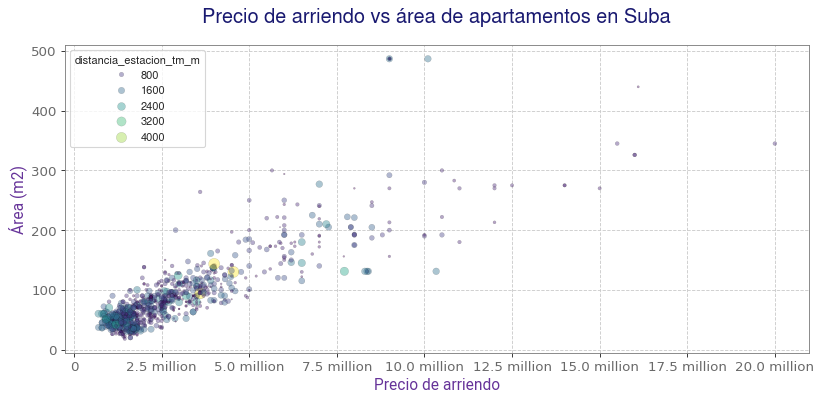

In [60]:
plt.figure(figsize=(12, 5))

sns.scatterplot(
    data=apartments.loc[apartments['localidad'] == 'SUBA'],
    x='precio_arriendo',
    y=apartments['area'].loc[(apartments['localidad'] == 'SUBA') & (apartments['area'] < 800) & (apartments['area'] > 0)],
    alpha=.4,
    size='distancia_estacion_tm_m',
    sizes=(1, 100),
    edgecolor='black',
    marker='o',
    hue='distancia_estacion_tm_m',
    palette='viridis',
)

plt.title('Precio de arriendo vs área de apartamentos en Suba', **title_font, pad=20)
plt.xlabel('Precio de arriendo', **subtitle_font)
plt.ylabel('Área (m2)', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.show()

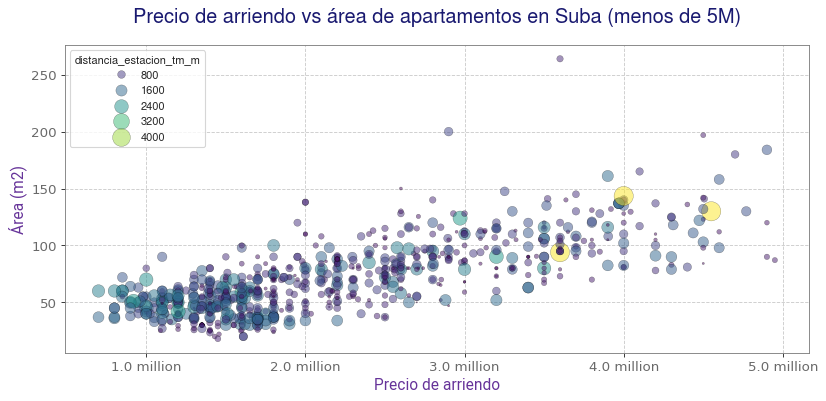

In [61]:
# Filtrar por apartamentos de menos de 5M para mejorar la visualización
apartments_menos_5M = apartments.loc[apartments['precio_arriendo'] < 5000000]

plt.figure(figsize=(12, 5))

sns.scatterplot(
    data=apartments_menos_5M.loc[apartments_menos_5M['localidad'] == 'SUBA'],
    x='precio_arriendo',
    y=apartments_menos_5M['area'].loc[(apartments_menos_5M['localidad'] == 'SUBA') & (apartments_menos_5M['area'] < 800) & (apartments_menos_5M['area'] > 0)],
    alpha=.5,
    size='distancia_estacion_tm_m',
    sizes=(0.5, 300),
    edgecolor='black',
    marker='o',
    hue='distancia_estacion_tm_m',
    palette='viridis',
)

plt.title('Precio de arriendo vs área de apartamentos en Suba (menos de 5M)', **title_font, pad=20)
plt.xlabel('Precio de arriendo', **subtitle_font)
plt.ylabel('Área (m2)', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.show()

In [62]:
# Filtrar por apartamentos que estén en la localidad de Suba
apartments_suba = apartments.loc[apartments['localidad'] == 'SUBA']

# Agrupar por sector y calcular estadísticas
grouped = apartments_suba.groupby('sector')['precio_arriendo']

# Calcular la mediana
medians = grouped.median()

# Calcular el primer y tercer cuartil para obtener el rango intercuartílico (IQR)
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)
iqr = q3 - q1

# Definir el error como la mitad del IQR (puedes ajustar esto según tus necesidades)
error = iqr / 2

# Obtener el valor mínimo por sector
min_values = grouped.min()

# Asegurarse de que las barras de error inferiores no vayan por debajo del mínimo
error_lower = medians - error
# Si el error inferior supera el mínimo, ajustarlo
error_lower = medians - min_values
# El error superior se mantiene igual
error_upper = error

# Crear un DataFrame resumen
summary = pd.DataFrame({
    'sector': medians.index,
    'median': medians.values,
    'error_lower': error_lower.values,
    'error_upper': error_upper.values
}).reset_index(drop=True)

# Ordenar los sectores según la mediana para una mejor visualización (opcional)
summary = summary.sort_values('median')


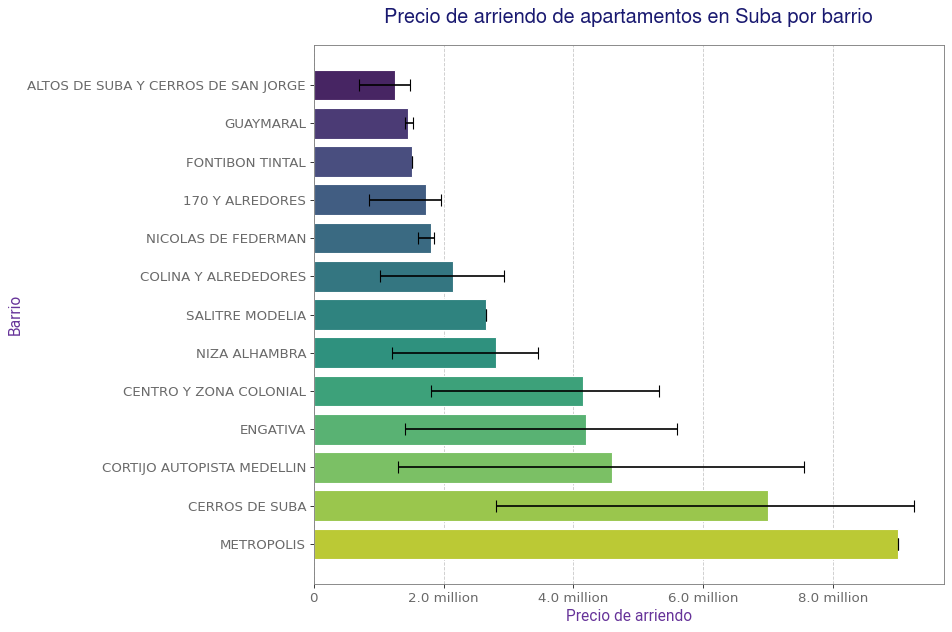

In [63]:

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el barplot con las medianas
sns.barplot(
    x='median',
    y='sector',
    data=summary,
    palette='viridis',
    orient='h'
)

# Añadir las barras de error
plt.errorbar(
    x=summary['median'],
    y=np.arange(len(summary)),
    xerr=[summary['error_lower'], summary['error_upper']],
    fmt='none',
    capsize=5,
    color='black',
)

# Configurar títulos y etiquetas
plt.title('Precio de arriendo de apartamentos en Suba por barrio', **title_font, pad=20)
plt.xlabel('Precio de arriendo', **subtitle_font)
plt.ylabel('Barrio', **subtitle_font)

# Formatear los ticks del eje x si es necesario
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

# Ajustar el tamaño de las fuentes de los ticks
plt.xticks(**text_font)
plt.yticks(**text_font)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [64]:
# Rango de precios para el sector NIZA ALHAMBRA a 2 desviaciones estándar
mean_price = apartments_suba.loc[apartments_suba['sector'] == 'NIZA ALHAMBRA', 'precio_arriendo'].mean()
x_range = 2 * apartments_suba.loc[apartments_suba['sector'] == 'NIZA ALHAMBRA', 'precio_arriendo'].std()
x_lims = [mean_price - x_range, mean_price + x_range]

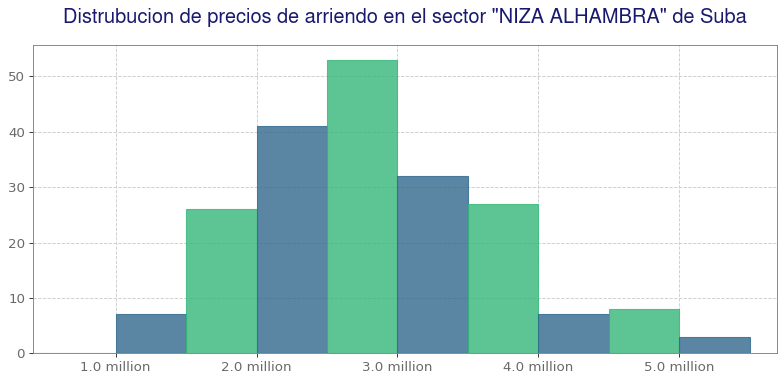

In [65]:
# Graficar precios en el sector "NIZA ALHAMBRA" de Suba
plt.figure(figsize=(12, 5))

bins = np.arange(0, np.ceil(x_lims[1] / 500000) * 500000, 500000)

hist = sns.histplot(
    data=apartments_suba.loc[apartments_suba['sector'] == 'NIZA ALHAMBRA'],
    x='precio_arriendo',
    bins=bins,
)

# Color intercalado para las barras usando colores de la paleta 'viridis'
colors = sns.color_palette('viridis', n_colors=2)
for i, bar in enumerate(hist.patches):
    bar.set_color(colors[i % 2])
    bar.set_alpha(.8)

plt.title('Distrubucion de precios de arriendo en el sector "NIZA ALHAMBRA" de Suba', **title_font, pad=20)
plt.xlabel('', **subtitle_font)
plt.ylabel('', **subtitle_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

plt.xlim(x_lims)
plt.xticks(**text_font)
plt.yticks(**text_font)
# Rotar las etiquetas del eje X
plt.show()


In [66]:
# Rango de precios por habitacion para el sector NIZA ALHAMBRA a 2 desviaciones estándar
mean_price = apartments_suba.loc[apartments_suba['sector'] == 'NIZA ALHAMBRA', 'precio_por_habitacion'].mean()
max_price = apartments_suba.loc[apartments_suba['sector'] == 'NIZA ALHAMBRA', 'precio_por_habitacion'].max()

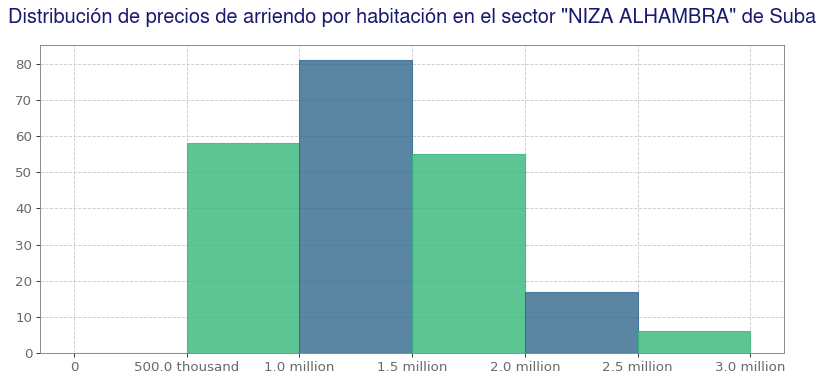

In [67]:
# Graficar precios por habitación en el sector "NIZA ALHAMBRA" de Suba
plt.figure(figsize=(12, 5))

bins = np.arange(0, np.ceil(max_price / 500000) * 500000, 500000)

hist = sns.histplot(
    data=apartments_suba.loc[apartments_suba['sector'] == 'NIZA ALHAMBRA'],
    x='precio_por_habitacion',
    bins=bins,
)

# Color intercalado para las barras usando colores de la paleta 'viridis'
colors = sns.color_palette('viridis', n_colors=2)
for i, bar in enumerate(hist.patches):
    bar.set_color(colors[i % 2])
    bar.set_alpha(.8)

plt.title('Distribución de precios de arriendo por habitación en el sector "NIZA ALHAMBRA" de Suba', **title_font, pad=20)
plt.xlabel('', **subtitle_font)
plt.ylabel('', **subtitle_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))

plt.xticks(**text_font)
plt.yticks(**text_font)
# Rotar las etiquetas del eje X
plt.show()

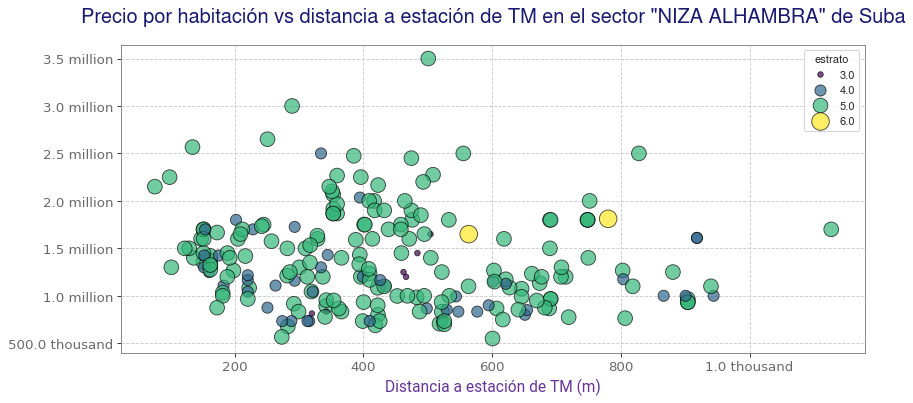

In [68]:
# Graficar precios por habitación en el sector "NIZA ALHAMBRA" de Suba con respecto a la distancia a la estación de TM
plt.figure(figsize=(12, 5))

sns.scatterplot(
    data=apartments_suba.loc[apartments_suba['sector'] == 'NIZA ALHAMBRA'],
    x='distancia_estacion_tm_m',
    y='precio_por_habitacion',
    alpha=.7,
    size='estrato',
    sizes=(25, 250),
    edgecolor='black',
    marker='o',
    hue='estrato',
    palette='viridis',
)

plt.title('Precio por habitación vs distancia a estación de TM en el sector "NIZA ALHAMBRA" de Suba',
            **title_font, pad=20)
plt.xlabel('Distancia a estación de TM (m)', **subtitle_font)
plt.ylabel('', **subtitle_font)
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.show()

In [69]:
# Estaciones de transmilenio mas cercanas a los apartamentos en Niza Alhambra
estaciones_cercanas_niza_alhambra = apartments_suba.loc[apartments_suba['sector'] == 'NIZA ALHAMBRA', 'estacion_tm_cercana'].value_counts()
estaciones_cercanas_niza_alhambra

estacion_tm_cercana
Puentelargo                 38
Suba - Calle 116            31
Calle 106                   31
Calle 127                   29
Humedal Córdoba             29
Pepe Sierra                 24
Suba - Calle 100            15
Ferias                       6
AV. Boyacá                   6
Suba - Calle 95              3
AV. 68                       3
Niza - Calle 127             2
Calle 100 - Marketmedios     1
Name: count, dtype: int64

# Que pasa en Chapinero

In [70]:
# Descripción de los precios por habitación en Chapinero
apartment_chapinero = apartments.loc[apartments['localidad'] == 'CHAPINERO']
apartment_chapinero['precio_por_habitacion'].describe().apply(lambda x: humanize.intword(x))

count      3.6 thousand
mean        3.5 million
std         1.6 million
min      533.3 thousand
25%         2.4 million
50%         3.3 million
75%         4.3 million
max        19.8 million
Name: precio_por_habitacion, dtype: object

In [71]:
apartment_chapinero['precio_arriendo'].describe().apply(lambda x: humanize.intword(x))

count      3.6 thousand
mean        8.4 million
std         4.7 million
min      900.0 thousand
25%         4.7 million
50%         7.5 million
75%        11.5 million
max        21.2 million
Name: precio_arriendo, dtype: object

In [74]:
# Filtrar por apartamentos que estén en la localidad de Suba
apartments_suba = apartments.loc[apartments['localidad'] == 'SUBA']

# Agrupar por sector y calcular estadísticas
grouped = apartments_suba.groupby('barrio')['precio_arriendo']

# Calcular la mediana
medians = grouped.median()

# Calcular el primer y tercer cuartil para obtener el rango intercuartílico (IQR)
q1 = grouped.quantile(0.25)
q3 = grouped.quantile(0.75)
iqr = q3 - q1

# Definir el error como la mitad del IQR (puedes ajustar esto según tus necesidades)
error = iqr / 2

# Obtener el valor mínimo por sector
min_values = grouped.min()

# Asegurarse de que las barras de error inferiores no vayan por debajo del mínimo
error_lower = medians - error
# Si el error inferior supera el mínimo, ajustarlo
error_lower = medians - min_values
# El error superior se mantiene igual
error_upper = error

# Crear un DataFrame resumen
summary = pd.DataFrame({
    'barrio': medians.index,
    'median': medians.values,
    'error_lower': error_lower.values,
    'error_upper': error_upper.values
}).reset_index(drop=True)

# Ordenar los sectores según la mediana para una mejor visualización (opcional)
summary = summary.sort_values('median')

# Get the top 10 barrios with the highest median rent prices
top_10_barrios = summary.nlargest(10, 'median')

# Get the bottom 10 barrios with the lowest median rent prices
bottom_10_barrios = summary.nsmallest(10, 'median')


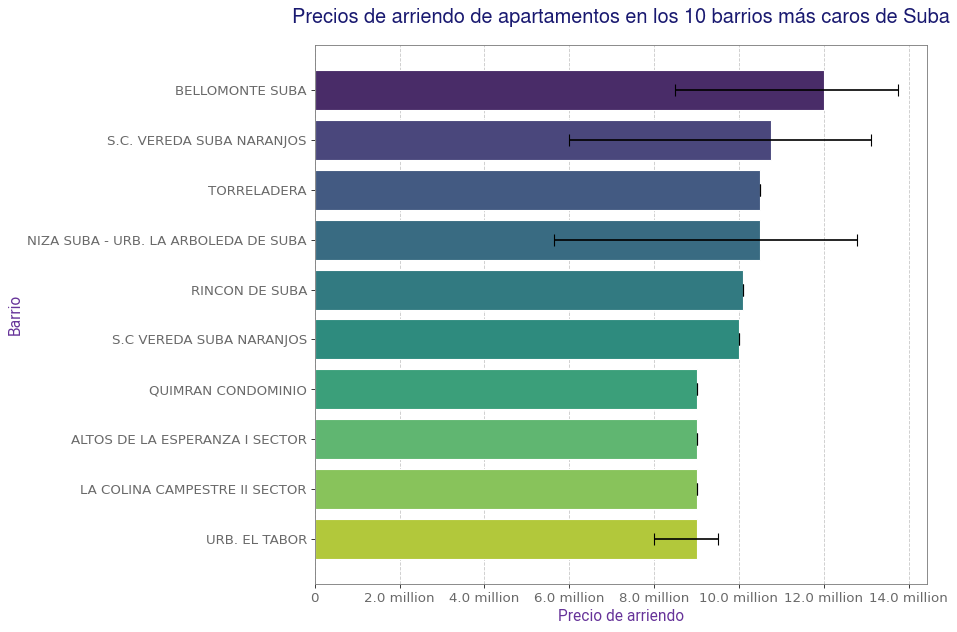

In [76]:
# Graficar los 10 barrios con los precios de arriendo más altos en Suba

plt.figure(figsize=(12, 8))

sns.barplot(
    x='median',
    y='barrio',
    data=top_10_barrios,
    palette='viridis',
    orient='h'
)

plt.errorbar(
    x=top_10_barrios['median'],
    y=np.arange(len(top_10_barrios)),
    xerr=[top_10_barrios['error_lower'], top_10_barrios['error_upper']],
    fmt='none',
    capsize=5,
    color='black',
)

plt.title('Precios de arriendo de apartamentos en los 10 barrios más caros de Suba', **title_font, pad=20)
plt.xlabel('Precio de arriendo', **subtitle_font)
plt.ylabel('Barrio', **subtitle_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.tight_layout()
plt.show()

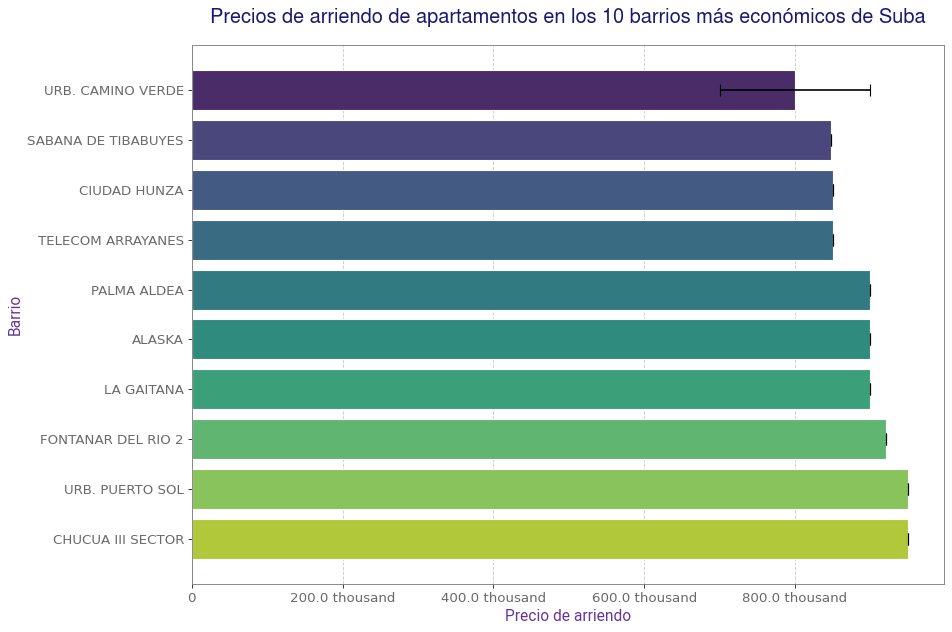

In [77]:
# Graficar los 10 barrios con los precios de arriendo más bajos en Suba

plt.figure(figsize=(12, 8))

sns.barplot(
    x='median',
    y='barrio',
    data=bottom_10_barrios,
    palette='viridis',
    orient='h'
)

plt.errorbar(
    x=bottom_10_barrios['median'],
    y=np.arange(len(bottom_10_barrios)),
    xerr=[bottom_10_barrios['error_lower'], bottom_10_barrios['error_upper']],
    fmt='none',
    capsize=5,
    color='black',
)

plt.title('Precios de arriendo de apartamentos en los 10 barrios más económicos de Suba', **title_font, pad=20)
plt.xlabel('Precio de arriendo', **subtitle_font)
plt.ylabel('Barrio', **subtitle_font)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(fotmat_tick_humanize))
plt.xticks(**text_font)
plt.yticks(**text_font)
plt.tight_layout()
plt.show()

In [80]:
import geopandas as gpd

In [79]:
# Create a map of the barrios in Suba with the median rent prices
plt.figure(figsize=(12, 12))

# Load the map of Bogotá
map_suba = gpd.read_file('../data/shapefiles/localidades_bogota/localidades_bogota.shp')

Index(['codigo', 'tipo_propiedad', 'area', 'habitaciones', 'banos',
       'administracion', 'parqueaderos', 'sector', 'estrato', 'antiguedad',
       'latitud', 'longitud', 'direccion', 'descripcion', 'website',
       'last_view', 'datetime', 'url', 'timeline', 'estado', 'compañia',
       'precio_arriendo', 'jacuzzi', 'piso', 'closets', 'chimenea',
       'permite_mascotas', 'gimnasio', 'ascensor', 'conjunto_cerrado',
       'piscina', 'salon_comunal', 'terraza', 'vigilancia', 'localidad',
       'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm', 'parque_cercano', 'distancia_parque_m',
       'is_cerca_parque', 'month', 'month_name',
       'distancia_estacion_tm_m_bins', 'precio_por_habitacion'],
      dtype='object')